# CAS BDAI Individual Innovation Project: Tennis Match Predictor

## Table of Contents 
1. [Introduction](#introduction)
2. [Preliminary steps](#preliminary-steps)
3. [ ](# )
4. [ ](# )
5. [ ](# )
6. [ ](# )
7. [ ](# )
8. [ ](# )


## Introduction <a name="introduction"></a>

### Tennis Match Predictor: GAImeSetMatch

### Goal of this project

### Steps to implement
1. Load and explore the data
2. Data processing and cleaning
3. Feature Engineering
    - Surface win %
    - Tournament level win %
    - Head-to-head
    - Recent form
4. Data Analysis
5. Prediction


![.png](img/project/image.png)

Image source: [something](https://example.com/)

## Preliminary steps <a name="preliminary-steps"></a>

### Set the path to the interpreter (OPTIONAL - skip if using Google Colab; modify if using local dev environment )

In [1]:
'''
#!/home/jean/Documents/dev/cas-project/venv_proj/bin/python3
'''

'\n#!/home/jean/Documents/dev/cas-project/venv_proj/bin/python3\n'

### Import the dependencies
We need to import the required libraries.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import re
%matplotlib inline

### Set static parameters
Here we set some parameters which won't be changed. This allows for more easy handling and viewing of the data being explored.

In [3]:
# first, set some static parameters and options (used later too for loading other files)

# directory containing the .csv files
DIRNAME = 'data'

# set options for pandas viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.reset_option('display.float_format')

### Define some helper functions and datasets
These will help us later with common tasks.

#### Sample data 5 observations

In [4]:

# Small sample dataframe (5 matches) for misc usage
sample_matches_df = pd.DataFrame(data = {
    'tourney_id': ['2000-301', '2000-301', '2000-301', '2000-301', '2000-301'],
    'tourney_name': ['Auckland', 'Auckland', 'Auckland', 'Auckland', 'Auckland'],
    'surface': ['Hard', 'Hard', 'Hard', 'Hard', 'Hard'],
    'draw_size': [32, 32, 32, 32, 32],
    'tourney_level': ['A', 'A', 'A', 'A', 'A'],
    'tourney_date': [20000110, 20000110, 20000110, 20000110, 20000110],
    'match_num': [1, 2, 3, 4, 5],
    'winner_id': [103163, 102607, 103252, 103507, 102103],
    'winner_seed': [1.0, None, None, 7.0, None],
    'winner_entry': [None, 'Q', None, None, 'Q'],
    'winner_name': ['Tommy Haas', 'Juan Balcells', 'Alberto Martin', 'Juan Carlos Ferrero', 'Michael Sell'],
    'winner_hand': ['R', 'R', 'R', 'R', 'R'],
    'winner_ht': [188.0, 190.0, 175.0, 183.0, 180.0],
    'winner_ioc': ['GER', 'ESP', 'ESP', 'ESP', 'USA'],
    'winner_age': [21.7, 24.5, 21.3, 19.9, 27.3],
    'loser_id': [101543, 102644, 102238, 103819, 102765],
    'loser_seed': [None, None, None, None, 4.0],
    'loser_entry': [None, None, None, None, None],
    'loser_name': ['Jeff Tarango', 'Franco Squillari', 'Alberto Berasategui', 'Roger Federer', 'Nicolas Escude'],
    'loser_hand': ['L', 'L', 'L', 'L', 'L'],
    'loser_ht': [180.0, 183.0, 173.0, 185.0, 185.0],
    'loser_ioc': ['USA', 'ARG', 'ESP', 'SUI', 'FRA'],
    'loser_age': [31.1, 24.3, 26.5, 18.4, 23.7],
    'score': ['7-5 4-6 7-5', '7-5 7-5', '6-3 6-1', '6-4 6-4', '0-6 7-6(7) 6-1'],
    'best_of': [3, 3, 3, 3, 3],
    'round': ['R32', 'R32', 'R32', 'R32', 'R32'],
    'minutes': [108.0, 85.0, 56.0, 68.0, 115.0],
    'w_ace': [18.0, 5.0, 0.0, 5.0, 1.0],
    'w_df': [4.0, 3.0, 0.0, 1.0, 2.0],
    'w_svpt': [96.0, 76.0, 55.0, 53.0, 98.0],
    'w_1stIn': [49.0, 52.0, 35.0, 28.0, 66.0],
    'w_1stWon': [39.0, 39.0, 25.0, 26.0, 39.0],
    'w_2ndWon': [28.0, 13.0, 12.0, 15.0, 14.0],
    'w_SvGms': [17.0, 12.0, 8.0, 10.0, 13.0],
    'w_bpSaved': [3.0, 5.0, 1.0, 0.0, 6.0],
    'w_bpFaced': [5.0, 6.0, 1.0, 0.0, 8.0],
    'l_ace': [7.0, 10.0, 6.0, 11.0, 8.0],
    'l_df': [8.0, 7.0, 6.0, 2.0, 8.0],
    'l_svpt': [106.0, 74.0, 56.0, 70.0, 92.0],
    'l_1stIn': [55.0, 32.0, 33.0, 43.0, 46.0],
    'l_1stWon': [39.0, 25.0, 20.0, 29.0, 34.0],
    'l_2ndWon': [29.0, 18.0, 7.0, 14.0, 18.0],
    'l_SvGms': [17.0, 12.0, 8.0, 10.0, 12.0],
    'l_bpSaved': [4.0, 3.0, 7.0, 6.0, 5.0],
    'l_bpFaced': [7.0, 6.0, 11.0, 8.0, 9.0],
    'winner_rank': [11.0, 211.0, 48.0, 45.0, 167.0],
    'winner_rank_points': [1612.0, 157.0, 726.0, 768.0, 219.0],
    'loser_rank': [63.0, 49.0, 59.0, 61.0, 34.0],
    'loser_rank_points': [595.0, 723.0, 649.0, 616.0, 873.0]
}
)

## Load and explore the data
This section loads the data available in .csv files from the aforementioned source, explores the data and then cleans it for ease of use and data quality.


### Load matches
Data is available in the form of results of ATP matches. For simplicity reasons, focus only on matches since the year 2000*. Each year is stored in one file using naming convention atp_matches_yyyy.csv.

*The reasoning behind this: since the year 2000, there have been factors that have influenced the outcomes of the modern form of the sport. For me, these are:
1. Racquet technology: Since the 1980s, rackets are made mainly out of graphite. Reference: [Link](https://www.pledgesports.org/2019/08/evolution-of-tennis-rackets/)
2. String technology: In the late 1990s, polyester strings were introduced, which revolutionised the sport. Reference: [Link](https://scientificinquirer.com/2021/08/30/string-theory-the-synthetic-revolution-that-changed-tennis-forever/)
3. Surfaces: in 2009, the ATP discontinued use of carpet court use in all its tournaments. Reference: [Link](https://racketsportsworld.com/tennis-not-played-carpet-courts/#When_was_Carpet_Discontinued_from_Use_in_Tennis)

In [5]:
# create a list of matches (since the year 2000 ) files to load
atp_match_files = [f'{DIRNAME}/atp_matches_{year}.csv' for year in range(2000, 2024)]

In [6]:
# create an empty dataframe to store all matches
matches_df = pd.DataFrame()

# loop through the list of match files, read them and append the data to the combined DataFrame
for filen in atp_match_files:
    matches_df = pd.concat([matches_df, pd.read_csv(filen, index_col=None)])


In [7]:
# explore the matches data
matches_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-301,Auckland,Hard,32,A,20000110,1,103163,1.000,NaN,Tommy Haas,R,188.000,GER,21.700,101543,NaN,NaN,Jeff Tarango,L,180.000,USA,31.100,7-5 4-6 7-5,3,R32,108.000,18.000,4.000,96.000,49.000,39.000,28.000,17.000,3.000,5.000,7.000,8.000,106.000,55.000,39.000,29.000,17.000,4.000,7.000,11.000,1612.000,63.000,595.000
1,2000-301,Auckland,Hard,32,A,20000110,2,102607,NaN,Q,Juan Balcells,R,190.000,ESP,24.500,102644,NaN,NaN,Franco Squillari,L,183.000,ARG,24.300,7-5 7-5,3,R32,85.000,5.000,3.000,76.000,52.000,39.000,13.000,12.000,5.000,6.000,5.000,10.000,74.000,32.000,25.000,18.000,12.000,3.000,6.000,211.000,157.000,49.000,723.000
2,2000-301,Auckland,Hard,32,A,20000110,3,103252,NaN,NaN,Alberto Martin,R,175.000,ESP,21.300,102238,NaN,NaN,Alberto Berasategui,R,173.000,ESP,26.500,6-3 6-1,3,R32,56.000,0.000,0.000,55.000,35.000,25.000,12.000,8.000,1.000,1.000,0.000,6.000,56.000,33.000,20.000,7.000,8.000,7.000,11.000,48.000,726.000,59.000,649.000
3,2000-301,Auckland,Hard,32,A,20000110,4,103507,7.000,NaN,Juan Carlos Ferrero,R,183.000,ESP,19.900,103819,NaN,NaN,Roger Federer,R,185.000,SUI,18.400,6-4 6-4,3,R32,68.000,5.000,1.000,53.000,28.000,26.000,15.000,10.000,0.000,0.000,11.000,2.000,70.000,43.000,29.000,14.000,10.000,6.000,8.000,45.000,768.000,61.000,616.000
4,2000-301,Auckland,Hard,32,A,20000110,5,102103,NaN,Q,Michael Sell,R,180.000,USA,27.300,102765,4.000,NaN,Nicolas Escude,R,185.000,FRA,23.700,0-6 7-6(7) 6-1,3,R32,115.000,1.000,2.000,98.000,66.000,39.000,14.000,13.000,6.000,11.000,8.000,8.000,92.000,46.000,34.000,18.000,12.000,5.000,9.000,167.000,219.000,34.000,873.000


In [8]:
# get an overview of number of features, instances, empty values and data types 
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71213 entries, 0 to 2368
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          71213 non-null  object 
 1   tourney_name        71213 non-null  object 
 2   surface             71213 non-null  object 
 3   draw_size           71213 non-null  int64  
 4   tourney_level       71213 non-null  object 
 5   tourney_date        71213 non-null  int64  
 6   match_num           71213 non-null  int64  
 7   winner_id           71213 non-null  int64  
 8   winner_seed         29586 non-null  float64
 9   winner_entry        8944 non-null   object 
 10  winner_name         71213 non-null  object 
 11  winner_hand         71204 non-null  object 
 12  winner_ht           69582 non-null  float64
 13  winner_ioc          71213 non-null  object 
 14  winner_age          71208 non-null  float64
 15  loser_id            71213 non-null  int64  
 16  loser

Alll features starting with "w_" or "l_" indicate in-game metrics, which is out of scope for this project. So we will remove them later. 

In [9]:
matches_df.describe()

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,loser_ht,loser_age,best_of,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,71213.000,71213.000,71213.000,71213.000,29586.000,69582.000,71208.000,71213.000,16330.000,67939.000,71207.000,71213.000,63277.000,64811.000,64811.000,64811.000,64811.000,64811.000,64811.000,64812.000,64811.000,64811.000,64811.000,64811.000,64811.000,64811.000,64811.000,64811.000,64812.000,64811.000,64811.000,70666.000,70666.000,69793.000,69793.000
mean,55.128,20109104.958,94.713,108736.809,7.376,186.138,26.284,108802.466,8.892,185.599,26.390,3.458,106.692,6.912,2.651,77.995,47.971,36.300,16.645,12.519,3.464,5.038,5.115,3.376,81.034,48.558,32.397,14.965,12.312,4.780,8.628,79.609,1592.650,117.938,965.143
std,40.045,68421.821,130.189,18210.110,6.790,6.811,3.959,18259.896,7.328,6.769,4.072,0.840,41.178,5.534,2.290,29.239,18.972,13.591,6.980,4.233,3.078,4.035,4.889,2.535,29.214,19.241,14.385,7.207,4.234,3.273,4.148,138.950,1997.658,186.050,1112.623
min,2.000,20000103.000,1.000,100644.000,1.000,163.000,14.900,100644.000,1.000,163.000,14.500,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000
25%,32.000,20050509.000,11.000,103498.000,3.000,183.000,23.400,103444.000,4.000,181.000,23.400,3.000,77.000,3.000,1.000,56.000,34.000,27.000,12.000,9.000,1.000,2.000,2.000,2.000,60.000,35.000,22.000,10.000,9.000,2.000,6.000,18.000,573.000,36.000,426.000
50%,32.000,20110117.000,28.000,104339.000,5.000,185.000,26.100,104338.000,7.000,185.000,26.200,3.000,99.000,6.000,2.000,73.000,45.000,34.000,16.000,11.000,3.000,4.000,4.000,3.000,76.000,45.000,30.000,14.000,11.000,4.000,8.000,45.000,933.000,68.000,703.000
75%,64.000,20170203.000,169.000,105227.000,9.000,190.000,29.000,105385.000,12.000,190.000,29.200,3.000,129.000,9.000,4.000,94.000,58.000,43.000,20.000,15.000,5.000,7.000,7.000,5.000,97.000,59.000,40.000,19.000,15.000,7.000,11.000,85.000,1715.000,114.000,1095.000
max,128.000,20230828.000,1701.000,211468.000,35.000,211.000,42.300,212041.000,35.000,211.000,46.000,5.000,1146.000,113.000,26.000,491.000,361.000,292.000,82.000,90.000,24.000,30.000,103.000,26.000,489.000,328.000,284.000,101.000,91.000,27.000,38.000,2101.000,16950.000,2159.000,16950.000


In [10]:
print("Amount of instances and features: " + str(matches_df.shape))

Amount of instances and features: (71213, 49)


### Exploring the matches

#### Zeros
Here we check for zeros in the matches mframe, in order to decide what to do with them.

In [11]:
# check all features for zero's
zero_count_per_feature= matches_df.apply(lambda col: (col == 0).sum())
zero_count_per_feature

tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed               0
winner_entry              0
winner_name               0
winner_hand               0
winner_ht                 0
winner_ioc                0
winner_age                0
loser_id                  0
loser_seed                0
loser_entry               0
loser_name                0
loser_hand                0
loser_ht                  0
loser_ioc                 0
loser_age                 0
score                     0
best_of                   0
round                     0
minutes                  47
w_ace                  2482
w_df                   9355
w_svpt                    5
w_1stIn                   5
w_1stWon                  7
w_2ndWon                 29
w_SvGms                   9
w_bpSaved             10751
w_bpFaced           

In [12]:
# explore the matches with 0 or less minutes
matches_lessthan_0mins = matches_df.loc[matches_df['minutes']<=0]
matches_lessthan_0mins.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
255,2020-580,Australian Open,Hard,128,G,20200120,188,126774,6.000,NaN,Stefanos Tsitsipas,R,193.000,GRE,21.400,104259,NaN,NaN,Philipp Kohlschreiber,R,178.000,GER,36.200,W/O,5,R64,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000,5375.000,79.000,700.000
361,2020-0891,Pune,Hard,32,A,20200203,287,105216,5.000,NaN,Yuichi Sugita,R,173.000,JPN,31.300,104678,NaN,Q,Viktor Troicki,R,193.000,SRB,33.900,W/O,3,R16,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.000,645.000,191.000,263.000
376,2020-0506,Buenos Aires,Clay,32,A,20200210,299,105155,NaN,LL,Pedro Sousa,R,180.000,POR,31.700,106043,1.000,NaN,Diego Schwartzman,R,170.000,ARG,27.400,W/O,3,SF,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.000,373.000,14.000,2325.000
454,2020-0407,Rotterdam,Hard,32,A,20200210,275,206173,NaN,WC,Jannik Sinner,R,188.000,ITA,18.400,105430,NaN,NaN,Radu Albot,R,175.000,MDA,30.200,W/O,3,R32,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.000,710.000,50.000,977.000
1258,2020-0352,Paris Masters,Hard,64,M,20201102,271,105227,NaN,NaN,Marin Cilic,R,198.000,CRO,32.000,144895,NaN,WC,Corentin Moutet,L,178.000,FRA,21.500,W/O,3,R32,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.000,1280.000,75.000,838.000


The matches lasting 0 minutes are all W/O ("Walkovers"), meaning that one player did not contest the match due to injury, illness, etc. These instances should not be used for predicting matches, as they don't measure a player's performance. 

#### Score contains text
Sometimes the score feature contains text, like "RET" (match retirement), in addition to the previously observation about W/O. If we want to calculate the number of games played, we should remove this later.

In [13]:
matches_score_text = matches_df[matches_df['score'].str.contains('[a-zA-Z]')]
matches_score_text.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
25,2000-301,Auckland,Hard,32,A,20000110,26,102021,NaN,NaN,Michael Chang,R,175.000,USA,27.800,101320,NaN,NaN,Magnus Gustafsson,R,185.000,SWE,33.000,7-5 3-6 1-0 RET,3,QF,113.000,0.000,1.000,68.000,35.000,24.000,16.000,12.000,6.000,9.000,6.000,6.000,85.000,55.000,37.000,14.000,11.000,9.000,12.000,50.000,722.000,60.000,626.000
31,2000-306,St. Poelten,Clay,32,A,20000522,1,102247,NaN,NaN,Andrea Gaudenzi,R,183.000,ITA,26.800,103017,1.000,NaN,Nicolas Kiefer,R,183.000,GER,22.800,6-7(4) 3-0 RET,3,R32,76.000,1.000,3.000,50.000,35.000,19.000,8.000,8.000,4.000,8.000,0.000,4.000,53.000,24.000,11.000,12.000,8.000,5.000,10.000,74.000,575.000,8.000,1874.000
33,2000-306,St. Poelten,Clay,32,A,20000522,3,102869,NaN,NaN,Galo Blanco,R,173.000,ESP,23.600,102987,NaN,NaN,Andre Sa,R,185.000,BRA,23.000,6-1 1-0 RET,3,R32,36.000,1.000,0.000,21.000,12.000,7.000,7.000,5.000,0.000,1.000,0.000,3.000,25.000,11.000,4.000,4.000,4.000,0.000,4.000,70.000,593.000,86.000,481.000
64,2000-308,Munich,Clay,32,A,20000501,3,102562,NaN,NaN,Jiri Novak,R,190.000,CZE,25.100,102783,NaN,NaN,Rainer Schuettler,R,180.000,GER,24.000,6-1 3-2 RET,3,R32,48.000,1.000,1.000,36.000,25.000,21.000,7.000,6.000,1.000,1.000,2.000,3.000,47.000,27.000,18.000,6.000,7.000,5.000,8.000,42.000,822.000,68.000,583.000
66,2000-308,Munich,Clay,32,A,20000501,5,103163,3.000,NaN,Tommy Haas,R,188.000,GER,22.000,102184,NaN,NaN,David Prinosil,R,185.000,GER,27.100,6-1 4-2 RET,3,R32,48.000,5.000,2.000,41.000,23.000,18.000,10.000,7.000,3.000,4.000,2.000,2.000,41.000,22.000,12.000,7.000,7.000,1.000,5.000,19.000,1230.000,94.000,418.000


#### NaN or empty values
Here we check for NaN or empty values in the matches mframe, in order to decide what to do with them.

In [14]:
# check all features for empty values
empty_count_per_feature= matches_df.isnull().sum()
empty_count_per_feature

tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed           41627
winner_entry          62269
winner_name               0
winner_hand               9
winner_ht              1631
winner_ioc                0
winner_age                5
loser_id                  0
loser_seed            54883
loser_entry           56629
loser_name                0
loser_hand               42
loser_ht               3274
loser_ioc                 0
loser_age                 6
score                     0
best_of                   0
round                     0
minutes                7936
w_ace                  6402
w_df                   6402
w_svpt                 6402
w_1stIn                6402
w_1stWon               6402
w_2ndWon               6402
w_SvGms                6401
w_bpSaved              6402
w_bpFaced           

Besides the features starting with "w_" or "l_", there are 8 features in the matches dataset which have empty values, and indication whether this will be used for prediction or not:
1. minutes - not used
2. seed - not used
3. entry - not used
4. hand - not used
5. ht (height) - not used
6. age - not used
7. rank - used
8. rank_points - not used

Of these 8 features, only 1 will be used: rank. Let's explore a few of these matches with an empty rank. 

In [15]:
# explore the matches with empty rank
matches_empty_rank = matches_df.loc[matches_df['winner_rank'].isnull() | matches_df['loser_rank'].isnull()]
matches_empty_rank.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
75,2000-308,Munich,Clay,32,A,20000501,14,210013,NaN,NaN,Martin Damm Sr,R,188.000,CZE,27.700,102563,NaN,NaN,Thomas Johansson,R,180.000,SWE,25.100,6-7(6) 7-6(5) 6-3,3,R32,153.000,16.000,0.000,105.000,69.000,57.000,22.000,17.000,1.000,1.000,11.000,2.000,119.000,59.000,46.000,34.000,16.000,9.000,10.000,NaN,NaN,58.000,663.000
84,2000-308,Munich,Clay,32,A,20000501,23,102644,7.000,NaN,Franco Squillari,L,183.000,ARG,24.600,210013,NaN,NaN,Martin Damm Sr,R,188.000,CZE,27.700,6-2 6-2,3,R16,64.000,2.000,2.000,51.000,26.000,19.000,16.000,8.000,3.000,3.000,2.000,2.000,49.000,28.000,16.000,8.000,8.000,2.000,6.000,52.000,733.000,NaN,NaN
224,2000-316,Bastad,Clay,32,A,20000710,15,103182,NaN,Q,Markus Hipfl,R,178.000,AUT,22.200,104026,NaN,WC,Joachim Johansson,R,198.000,SWE,18.000,6-3 RET,3,R32,34.000,3.000,0.000,21.000,14.000,12.000,4.000,5.000,0.000,0.000,2.000,0.000,26.000,8.000,6.000,7.000,5.000,0.000,2.000,103.000,388.000,NaN,NaN
568,2000-338,Sydney,Hard,32,A,20000110,9,102344,5.000,NaN,Karol Kucera,R,188.000,SVK,25.800,210013,NaN,NaN,Martin Damm Sr,R,188.000,CZE,27.400,7-6(3) 6-1,3,R32,69.000,4.000,2.000,48.000,28.000,25.000,16.000,9.000,0.000,0.000,1.000,3.000,67.000,35.000,25.000,15.000,10.000,7.000,10.000,17.000,1346.000,NaN,NaN
718,2000-359,Bogota,Clay,32,A,20000306,3,103082,NaN,NaN,Markus Hantschk,R,188.000,GER,22.200,101991,NaN,Q,Mauricio Hadad,R,170.000,COL,28.200,4-6 6-0 6-4,3,R32,110.000,2.000,4.000,79.000,32.000,21.000,22.000,13.000,2.000,6.000,2.000,1.000,76.000,40.000,17.000,18.000,13.000,7.000,14.000,105.000,391.000,NaN,NaN


The matches with players having no (empty) rank could be because they are new, or have been inactive due to injury and hence lost their ranking before returning. We can try and look up their last valid ranking in the rankings file later. 

Next, do the values for rank make sense?

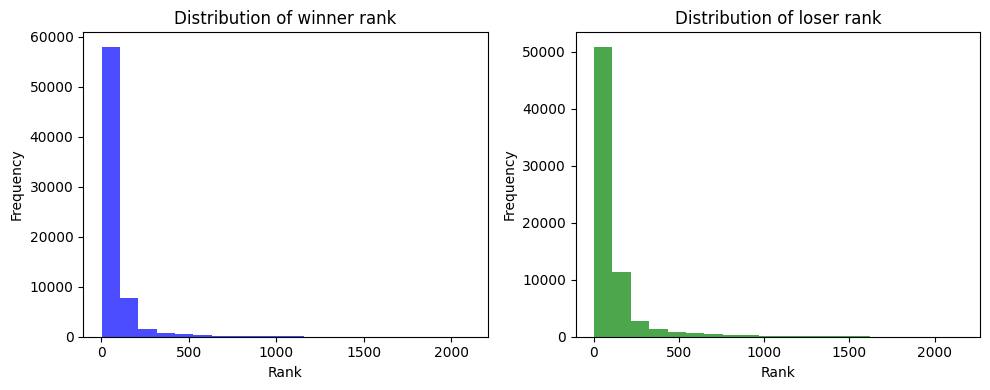

In [16]:
matches_with_rank = matches_df.loc[~matches_df['winner_rank'].isnull() & ~matches_df['loser_rank'].isnull()]

# Plot 2 histograms for distribution of values for "rank"
# Create subplots for the histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first histogram for winner_rank
ax1.hist(matches_with_rank['winner_rank'], bins=20, color='blue', alpha=0.7)
ax1.set_title('Distribution of winner rank')
ax1.set_xlabel('Rank')
ax1.set_ylabel('Frequency')

# Plot the second histogram for loser_rank
ax2.hist(matches_with_rank['loser_rank'], bins=20, color='green', alpha=0.7)
ax2.set_title('Distribution of loser rank')
ax2.set_xlabel('Rank')
ax2.set_ylabel('Frequency')

# Display the histograms
plt.tight_layout()
plt.show()

The histogram shows that most matches are won by players ranked in the top 100 (~60'000), which makes sense. Also, there are no outlier values like rank=5'000.

In [17]:
# could matches with empty minutes be due to the tourney_level?
# print(matches_empty_minutes['tourney_level'].value_counts())

#### Tournament start dates
It would be interesting to see on which weekdays tournaments start. Becuase later, we want to link the rankings data with the matches data, so a common day of the week  would be required.

In [18]:
# convert date from tourney_date 
matches_tournament_starts = matches_df.copy()
matches_tournament_starts['tourney_date_dt'] = pd.to_datetime(matches_df['tourney_date'], format='%Y%m%d')

# create a column representing the day of the week
matches_tournament_starts['tourney_date_dt_day_name'] = matches_tournament_starts['tourney_date_dt'].dt.day_name()

# day of week frequency for matches and rankingsday of week frequency for matches and rankings
matches_tournament_starts['tourney_date_dt_day_name'].value_counts(normalize=True)

Monday      0.809
Friday      0.088
Sunday      0.074
Thursday    0.013
Wednesday   0.011
Saturday    0.004
Tuesday     0.001
Name: tourney_date_dt_day_name, dtype: float64

As seen above, ca. **81%** of the matches started on a Monday. This is a strong case to say that for simplicity, we set all matches to start at the beginning of the week which would be Monday. But before doing this, let's see which matches don't start on a Monday and group by tournament type, then display the results using a bar chart.

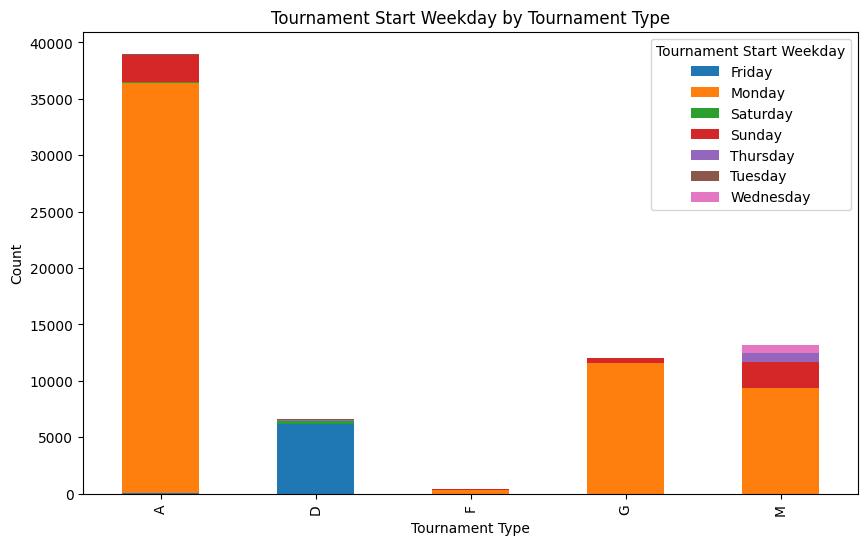

In [19]:
# Group the matches_tournament_starts by 'tourney_level' and 'tourney_date_dt_day_name' and count the occurrences
matches_tournament_starts = matches_tournament_starts.groupby(['tourney_level', 'tourney_date_dt_day_name']).size().unstack().fillna(0)

# Create a stacked bar chart
matches_tournament_starts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('Tournament Type')
plt.ylabel('Count')
plt.title('Tournament Start Weekday by Tournament Type')

# Display the legend
plt.legend(title='Tournament Start Weekday', loc='upper right')

# Show the plot
plt.show()

From [matches_data_dictionary.txt](data/matches_data_dictionary.txt):
- 'G' = Grand Slams
- 'M' = Masters 1000s
- 'A' = other tour-level events
- 'C' = Challengers
- 'S' = Satellites/ITFs
- 'F' = Tour finals and other season-ending events
- 'D' = Davis Cup 

Most tournaments start on a Monday, with a notable exception: Davis Cup, which are run over weekends and start on a Friday. 
**Decision**: For better linking with rankings, we've decided that we will set all tournaments' start dates to the Monday which precedes it. For example, if its Friday yyyy-mm-dd, then a supplemental date feature will be provided for its preceding Monday yyyy-mm-dd.

### Prediction benchmark for matches
In order to evaluate the prediction accuracy of our model, we need a benchmark to compare when predicting the results of matches. One simple benchmark would be to assume that the higher (i.e. closer to 1) ranked player will always win. This "higher-ranked player win ratio" can easily be calculated using the features available in the original dataset.
We know that some rankings are empty, so we will just substitute a number higher than the max. ranking (which is 2101).

In [20]:
# setting a prediction benchmark, empty ranking means no ranking, so replace with a arbitrary high value
matches_wins_by_ranking_df = matches_df.copy()
matches_wins_by_ranking_df[['winner_rank','loser_rank']] = matches_wins_by_ranking_df[['winner_rank','loser_rank']].fillna(value=10000)

# add a new feature which is the result of checking whether the winner was ranked higher (i.e. closer to 1) than the loser
matches_wins_by_ranking_df['winning_player_ranked'] = matches_wins_by_ranking_df.apply(lambda x: "higher" if x['winner_rank'] < x['loser_rank'] else "lower", axis=1)
matches_wins_by_ranking_df['winning_player_ranked'].value_counts(normalize=True)*100

higher   65.638
lower    34.362
Name: winning_player_ranked, dtype: float64

So we see that for our dataset, the higher ranked player won **65.6%** of all the matches. This will be our benchmark for evaluating the model.

### Load rankings
Data is also available in the form of ranking of ATP players. It may be required to supplement the missing data for current rankings in the matches dataset, for example, a player doesn't have a ranking at the time of playing a match. 

### Exploring the rankings data

In [21]:
# create a list of rankings (since the year 2000 ) files to load
atp_rankings_files = [f'{DIRNAME}/atp_rankings_{year}.csv' for year in ['00s','10s', '20s', 'current']]

In [22]:
# create an empty dataframe to store all rankings
rankings_df = pd.DataFrame()

# loop through the list of rankings files, read them and append the data to the combined DataFrame
for filen in atp_rankings_files:
    rankings_df = pd.concat([rankings_df, pd.read_csv(filen, index_col=None)])


In [23]:
# explore the rankings data
rankings_df.head()

,ranking_date,rank,player,points
0,20000110,1,101736,4135.000
1,20000110,2,102338,2915.000
2,20000110,3,101948,2419.000
3,20000110,4,103017,2184.000
4,20000110,5,102856,2169.000


In [24]:
# get an overview of number of features, instances, empty values and data types 
rankings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140631 entries, 0 to 58510
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   ranking_date  int64  
 1   rank          int64  
 2   player        int64  
 3   points        float64
dtypes: float64(1), int64(3)
memory usage: 81.7 MB


In [25]:
# sanity checks on the data (min values, max values, etc.)
rankings_df.describe()

,ranking_date,rank,player,points
count,2140631.000,2140631.000,2140631.000,2139882.000
mean,20112972.331,941.096,119768.989,117.056
std,66763.213,547.581,31216.724,455.880
min,20000110.000,1.000,100149.000,1.000
25%,20060213.000,470.000,104128.000,2.000
50%,20110919.000,946.000,105498.000,10.000
75%,20170306.000,1381.000,120568.000,65.000
max,20230911.000,2271.000,212464.000,16950.000


From the above table, the min and max values for the rankings make sense. Also, the ranking_date makes sense. Finally, there are no missing values, so no data cleaning is required on this dataset.

In [26]:
print("Amount of instances and features: " + str(rankings_df.shape))

Amount of instances and features: (2140631, 4)


#### Ranking dates
Similar to which weekdays tournaments start, let's look at the days on which the rankings get updated. Becuase later, we want to link the rankings data with the matches data, so a common day of the week  would be required.

In [27]:
# convert date from ranking_date 
ranking_update = rankings_df.copy()
ranking_update['ranking_date_dt'] = pd.to_datetime(rankings_df['ranking_date'], format='%Y%m%d')

# create a column representing the day of the week
ranking_update['ranking_date_dt_day_name'] = ranking_update['ranking_date_dt'].dt.day_name()

# day of week frequency for ranking
ranking_update['ranking_date_dt_day_name'].value_counts(normalize=True)

Monday   1.000
Name: ranking_date_dt_day_name, dtype: float64

**All (100%)** of the rankings are updated on a Monday. Therefore, we are aligned with the idea to set all tournament start dates to a Monday.

Below is a final view of the loaded data for rankings, with the new column for the datetime formatted `ranking_date_dt`

In [28]:
# check data types
print(rankings_df.info())

# preview data
rankings_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140631 entries, 0 to 58510
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   ranking_date  int64  
 1   rank          int64  
 2   player        int64  
 3   points        float64
dtypes: float64(1), int64(3)
memory usage: 81.7 MB
None


,ranking_date,rank,player,points
0,20000110,1,101736,4135.000
1,20000110,2,102338,2915.000
2,20000110,3,101948,2419.000
3,20000110,4,103017,2184.000
4,20000110,5,102856,2169.000


## Data processing and cleaning

### Scope of processing and cleaning
1. Replace the matches' winner and loser columns
2. Clean the date features and make them consistent
3. Ensure the matches are sorted as needed
4. Remove matches with result as W/O
5. Players without rankings: 
- seasoned players  (they had a long layoff due to injury, etc.). keep match and lookup ranking from earlier. Apply penalty of 10 ranking places for each week they were absent.
- if they played less than 10 matches (cumulative) - remove match


### Execute the processing and cleaning

#### Start with a copy of the original loaded dataframes

In [29]:
matches_processed_df = matches_df.copy()
matches_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71213 entries, 0 to 2368
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          71213 non-null  object 
 1   tourney_name        71213 non-null  object 
 2   surface             71213 non-null  object 
 3   draw_size           71213 non-null  int64  
 4   tourney_level       71213 non-null  object 
 5   tourney_date        71213 non-null  int64  
 6   match_num           71213 non-null  int64  
 7   winner_id           71213 non-null  int64  
 8   winner_seed         29586 non-null  float64
 9   winner_entry        8944 non-null   object 
 10  winner_name         71213 non-null  object 
 11  winner_hand         71204 non-null  object 
 12  winner_ht           69582 non-null  float64
 13  winner_ioc          71213 non-null  object 
 14  winner_age          71208 non-null  float64
 15  loser_id            71213 non-null  int64  
 16  loser

In [30]:
rankings_processed_df = rankings_df.copy()
rankings_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140631 entries, 0 to 58510
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   ranking_date  int64  
 1   rank          int64  
 2   player        int64  
 3   points        float64
dtypes: float64(1), int64(3)
memory usage: 81.7 MB


#### Hide winner and loser from columns names
Replace columns starting with 'winner_' and 'loser_' with 'player_1_' and 'player_2_' for the required features. As we want to be able to predict who will be the winner and the loser in each match, we remove the 'winner_' and 'loser_' columns for each match, and instead replace it with player_1_ and player_2 according to which the ranking of the players. 

The features starting with 'w_' and 'l_' are measures recorded during the match and will not be used in the model for predicting the outcome, so we remove these features.
We will add a column at the end of the dataframe, which will serve as our y variable.

In [31]:
def hide_winner_loser(input_df):
    # List of required features to be replaced with prefixes player_1 and player_2
    features = ['id', 'seed', 'entry', 'name', 'hand', 'ht', 'ioc', 'age', 'rank', 'rank_points']
    
    # Copy the input DataFrame to a new one
    df = input_df.copy()

    # Add player_1_name and player_2_name columns based on higher rank
    df['player_1_name'] = np.where((df['winner_rank'].fillna(float('inf')) <= df['loser_rank'].fillna(float('inf'))),
                                   df['winner_name'],
                                   df['loser_name']
                                   )
    df['player_2_name'] = np.where((df['winner_rank'].fillna(float('inf')) > df['loser_rank'].fillna(float('inf'))),
                                   df['winner_name'],
                                   df['loser_name']
                                   )

    # Transfer the values from 'winner_' and 'loser_' features to 'player_1_' and 'player_2_' features, according to who was the winner & loser
    for feat in features:
        player_1_feature = np.where(df['player_1_name'] == df['winner_name'],
                                    df['winner_' + feat],
                                    df['loser_' + feat]
                                    )
        player_2_feature = np.where(df['player_2_name'] == df['winner_name'],
                                    df['winner_' + feat],
                                    df['loser_' + feat]
                                    )
        df['player_1_' + feat] = player_1_feature
        df['player_2_' + feat] = player_2_feature   

          
    # Add a winner column
    df['winner'] = df.apply(lambda row: 'player_1' if row['winner_name'] == row['player_1_name'] else 'player_2', axis=1)

    # Remove columns starting with 'winner_' and 'loser_' (they have been replaced by player_1_ and player_2_)
    df = df.loc[:, ~df.columns.str.startswith('winner_') & ~df.columns.str.startswith('loser_')]

    # Remove columns starting with 'w_' and 'l_' (not needed for predicting_)
    df = df.loc[:, ~df.columns.str.startswith('w_') & ~df.columns.str.startswith('l_')]

    return df


Let us test the function hide_winner_loser with a sample dataset of 5 instances. Observe the renamed features, from "winnner_" and "loser_" to "player_1" and " player_2", and the new feature called "winner" (our y variable).

In [32]:
output_df = hide_winner_loser(sample_matches_df)
output_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tourney_id            5 non-null      object 
 1   tourney_name          5 non-null      object 
 2   surface               5 non-null      object 
 3   draw_size             5 non-null      int64  
 4   tourney_level         5 non-null      object 
 5   tourney_date          5 non-null      int64  
 6   match_num             5 non-null      int64  
 7   score                 5 non-null      object 
 8   best_of               5 non-null      int64  
 9   round                 5 non-null      object 
 10  minutes               5 non-null      float64
 11  player_1_name         5 non-null      object 
 12  player_2_name         5 non-null      object 
 13  player_1_id           5 non-null      int64  
 14  player_2_id           5 non-null      int64  
 15  player_1_seed         3 non

In [33]:
output_df[['tourney_id'
           , 'player_1_name', 'player_1_rank'
           , 'player_2_name', 'player_2_rank']]

,tourney_id,player_1_name,player_1_rank,player_2_name,player_2_rank
0,2000-301,Tommy Haas,11.000,Jeff Tarango,63.000
1,2000-301,Franco Squillari,49.000,Juan Balcells,211.000
2,2000-301,Alberto Martin,48.000,Alberto Berasategui,59.000
3,2000-301,Juan Carlos Ferrero,45.000,Roger Federer,61.000
4,2000-301,Nicolas Escude,34.000,Michael Sell,167.000


In [34]:
# replace the winner and loser columns with player_1 and player_2 for the matches dataset
matches_processed_df= hide_winner_loser(matches_processed_df)
matches_processed_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,player_1_name,player_2_name,player_1_id,player_2_id,player_1_seed,player_2_seed,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_ioc,player_2_ioc,player_1_age,player_2_age,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,winner
0,2000-301,Auckland,Hard,32,A,20000110,1,7-5 4-6 7-5,3,R32,108.000,Tommy Haas,Jeff Tarango,103163,101543,1.000,NaN,NaN,NaN,R,L,188.000,180.000,GER,USA,21.700,31.100,11.000,63.000,1612.000,595.000,player_1
1,2000-301,Auckland,Hard,32,A,20000110,2,7-5 7-5,3,R32,85.000,Franco Squillari,Juan Balcells,102644,102607,NaN,NaN,NaN,Q,L,R,183.000,190.000,ARG,ESP,24.300,24.500,49.000,211.000,723.000,157.000,player_2
2,2000-301,Auckland,Hard,32,A,20000110,3,6-3 6-1,3,R32,56.000,Alberto Martin,Alberto Berasategui,103252,102238,NaN,NaN,NaN,NaN,R,R,175.000,173.000,ESP,ESP,21.300,26.500,48.000,59.000,726.000,649.000,player_1
3,2000-301,Auckland,Hard,32,A,20000110,4,6-4 6-4,3,R32,68.000,Juan Carlos Ferrero,Roger Federer,103507,103819,7.000,NaN,NaN,NaN,R,R,183.000,185.000,ESP,SUI,19.900,18.400,45.000,61.000,768.000,616.000,player_1
4,2000-301,Auckland,Hard,32,A,20000110,5,0-6 7-6(7) 6-1,3,R32,115.000,Nicolas Escude,Michael Sell,102765,102103,4.000,NaN,NaN,Q,R,R,185.000,180.000,FRA,USA,23.700,27.300,34.000,167.000,873.000,219.000,player_2


#### Clean and consistent date features

In [35]:
# create new column for datetime datatype version of the date columns
matches_processed_df['tourney_date_dt'] = pd.to_datetime(matches_processed_df['tourney_date'], format='%Y%m%d')
rankings_processed_df['ranking_date_dt'] = pd.to_datetime(rankings_processed_df['ranking_date'], format='%Y%m%d')

#### Ensure the matches are sorted as needed
This is crucial as we are calculating cumulative measures (e.g. count of prior matches) to base a prediction on. It's not required for the rankings dataset.

In [36]:
# sort matches by tourney_date, tourney_id and match_num, and reset the index as the old one is not required anymore.
matches_processed_df = matches_processed_df.sort_values(['tourney_date', 'tourney_id', 'match_num'], ascending=True)
matches_processed_df = matches_processed_df.reset_index(drop=True) 
matches_processed_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,player_1_name,player_2_name,player_1_id,player_2_id,player_1_seed,player_2_seed,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_ioc,player_2_ioc,player_1_age,player_2_age,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,winner,tourney_date_dt
0,2000-339,Adelaide,Hard,32,A,20000103,1,6-3 6-4,3,R32,76.000,Thomas Enqvist,Arnaud Clement,102358,103096,1.000,NaN,NaN,NaN,R,R,190.000,173.000,SWE,FRA,25.700,22.000,4.000,56.000,2606.000,805.000,player_1,2000-01-03
1,2000-339,Adelaide,Hard,32,A,20000103,2,6-1 6-4,3,R32,45.000,Roger Federer,Jens Knippschild,103819,102533,NaN,NaN,NaN,NaN,R,R,185.000,190.000,SUI,GER,18.300,24.800,64.000,91.000,749.000,525.000,player_1,2000-01-03
2,2000-339,Adelaide,Hard,32,A,20000103,3,3-6 7-6(5) 6-4,3,R32,115.000,Jan Michael Gambill,Wayne Arthurs,102998,101885,NaN,NaN,NaN,NaN,R,L,190.000,190.000,USA,AUS,22.500,28.700,58.000,105.000,803.000,449.000,player_1,2000-01-03
3,2000-339,Adelaide,Hard,32,A,20000103,4,6-2 6-1,3,R32,65.000,Sebastien Grosjean,Andrew Ilie,103206,102776,7.000,NaN,NaN,NaN,R,R,175.000,180.000,FRA,AUS,21.500,23.600,27.000,54.000,1298.000,845.000,player_1,2000-01-03
4,2000-339,Adelaide,Hard,32,A,20000103,5,6-4 6-4,3,R32,68.000,Magnus Norman,Scott Draper,102796,102401,3.000,NaN,NaN,WC,R,L,188.000,178.000,SWE,AUS,23.500,25.500,15.000,154.000,1748.000,297.000,player_1,2000-01-03


#### Remove matches with result as W/O
W/O stands for "Walkover". Matches resulting in W/O should not be considered, so remove them. 

In [37]:
# remove matches resulting in a W/O
matches_processed_df = matches_processed_df[matches_processed_df['score'] != 'W/O']
len(matches_processed_df)

70910

Down from 71'213 to 70'910 instances

#### Remove matches with 0 or less minutes
Not needed

In [38]:
# remove matches with 0 or less minutes
# matches_df = matches_df.loc[matches_df['minutes']<0]


#### Add feature for matches dataset that all tournaments start dates are shown as a Monday

In [39]:
# add feature for tournaments not starting on a Monday, with its value being the preceding Monday
matches_processed_df['tourney_date_dt'] = pd.to_datetime(matches_processed_df['tourney_date'], format='%Y%m%d')
matches_processed_df['tourney_date_dt_preceding_monday'] = matches_processed_df['tourney_date_dt'].apply(lambda x: x - pd.DateOffset(days=x.weekday()) if x.weekday() != 0 else x)

# verify that this feature's date values are all on a Monday
matches_processed_df['tourney_date_dt_preceding_monday'].dt.day_name().value_counts()

Monday    70910
Name: tourney_date_dt_preceding_monday, dtype: int64

In [40]:
# check examples of these new column values compared to its original
matches_processed_df[matches_processed_df['tourney_date_dt'].dt.day_name() != 'Monday'][['tourney_date_dt', 'tourney_date_dt_preceding_monday']].groupby(['tourney_date_dt', 'tourney_date_dt_preceding_monday']).size().reset_index(name='count').head(3)

,tourney_date_dt,tourney_date_dt_preceding_monday,count
0,2000-01-28,2000-01-24,6
1,2000-02-04,2000-01-31,88
2,2000-03-17,2000-03-13,4


- 28 Jan. 2000 was a Friday, and 24 Jan. 2000 was the preceding Monday
- 4 Feb. 2000 was a Friday, and 31 Jan. 2000 was the preceding Monday
- 17 Mar. 2000 was a Friday, and 13 Mar. 2000 was the preceding Monday

In [41]:
# matches_processed_df.to_csv("matches_processed_df.csv", sep=",", header=True)

#### Process matches with new players having no ranking 
Remove matches where 1 opponent has so far played less than 10 completed matches. 
Notes: 
- Don't remove matches in the year 2000, as our players could have played 10 matches prior to the year 2000, and our cumulative count features need a year to get working.
- W/O matches don't count, but retirements do.

In [42]:
### example of players where 1 opponent has so far played < 10 completed matches

#### Process matches with seasoned players having no ranking
As explained before, there are matches with seasoned (experienced on the ATP Tour) players having no (empty) rank possibly because they have been inactive due to injury and hence lost their ranking before returning. If they are not new players, we can try and look up their last valid ranking in the rankings file. A recent example is Kevin Anderson, who was inactive for a period due to retiring in May 2022 and then announcing his comeback in July 2023* 

*Source: [Wikipedia "Kevin_Anderson (tennis)", accessed Oct. 2023](https://en.wikipedia.org/wiki/Kevin_Anderson_(tennis))

We will: 
1. for a particular match, find the latest available historical ranking in the rankings dataset for the player in the matches dataset
2. add 10 to the ranking for each week where the player was inactive.

In [43]:
# example of player previously having a ranking but later no ranking
matches_processed_ka_df = matches_processed_df[(matches_processed_df['player_1_name'] == 'Kevin Anderson') 
                                                | (matches_processed_df['player_2_name'] == 'Kevin Anderson')].tail()
matches_processed_ka_df[['tourney_date_dt', 'player_1_id', 'player_2_id', 'player_1_name', 'player_2_name', 'player_1_rank', 'player_2_rank']]

,tourney_date_dt,player_1_id,player_2_id,player_1_name,player_2_name,player_1_rank,player_2_rank
66779,2022-03-21,104731,207678,Kevin Anderson,Juan Manuel Cerundolo,91.000,122.000
70693,2023-07-17,209113,104731,Gabriel Diallo,Kevin Anderson,141.000,NaN
70704,2023-07-17,133835,104731,Gijs Brouwer,Kevin Anderson,145.000,NaN
70710,2023-07-17,200005,104731,Ugo Humbert,Kevin Anderson,40.000,NaN
70867,2023-07-31,111442,104731,Jordan Thompson,Kevin Anderson,71.000,652.000


In [44]:
# define static parameter
rank_penalty_per_week_inactivity = 10

# define a function to look up historic rankings for players having no ranking in a particular match
def impute_missing_rankings(m, r):
    last_rankings = {}  # Dictionary to store the last available player_rank for each player_id

    for i, row in m.iterrows():
        if pd.isna(row['player_1_rank']):
            week = row['tourney_date_dt'] - dt.timedelta(days=row['tourney_date_dt'].weekday())
            p1_id = row['player_1_id']

            # Find the last available ranking date prior to the tourney_date_dt
            last_ranking_date = r[(r['player'] == p1_id) & (r['ranking_date_dt'] < week)]['ranking_date_dt'].max()

            if last_ranking_date:
                last_ranking_row = r[(r['player'] == p1_id) & (r['ranking_date_dt'] == last_ranking_date)]
                if not last_ranking_row.empty:
                    last_rank = last_ranking_row['rank'].values[0]
                    weeks_difference = (week - last_ranking_date).days // 7
                    imputed_rank = last_rank + weeks_difference * rank_penalty_per_week_inactivity
                    if imputed_rank > 3333: # Don't over-penalize
                        m.at[i, 'player_1_rank'] = 3333   # Set a default value   
                    else: 
                        m.at[i, 'player_1_rank'] = imputed_rank
                        last_rankings[p1_id] = imputed_rank
                else:
                    m.at[i, 'player_1_rank'] = 3333  # Set a default value
            else:
                m.at[i, 'player_1_rank'] = 3333  # Set a default value

        if pd.isna(row['player_2_rank']):
            week = row['tourney_date_dt'] - dt.timedelta(days=row['tourney_date_dt'].weekday())
            p2_id = row['player_2_id']

            # Find the last available ranking date prior to the tourney_date_dt
            last_ranking_date = r[(r['player'] == p2_id) & (r['ranking_date_dt'] < week)]['ranking_date_dt'].max()

            if last_ranking_date:
                last_ranking_row = r[(r['player'] == p2_id) & (r['ranking_date_dt'] == last_ranking_date)]
                if not last_ranking_row.empty:
                    last_rank = last_ranking_row['rank'].values[0]
                    weeks_difference = (week - last_ranking_date).days // 7
                    imputed_rank = last_rank + weeks_difference * rank_penalty_per_week_inactivity
                    if imputed_rank > 3333: # Don't over-penalize
                        m.at[i, 'player_2_rank'] = 3333   # Set a default value   
                    else:
                        m.at[i, 'player_2_rank'] = imputed_rank
                        last_rankings[p2_id] = imputed_rank
                else: 
                    m.at[i, 'player_2_rank'] = 3333  # Set a default value
            else:
                m.at[i, 'player_2_rank'] = 3333  # Set a default value


Test the function using the example of Kevin Anderson:

In [45]:
# test function using only reduced dataset: Kevin Anderson
impute_missing_rankings(matches_processed_ka_df, rankings_processed_df)
matches_processed_ka_df[['tourney_date_dt', 'player_1_name', 'player_2_name', 'player_1_rank', 'player_2_rank','round', 'winner']]

,tourney_date_dt,player_1_name,player_2_name,player_1_rank,player_2_rank,round,winner
66779,2022-03-21,Kevin Anderson,Juan Manuel Cerundolo,91.000,122.000,R64,player_2
70693,2023-07-17,Gabriel Diallo,Kevin Anderson,141.000,704.000,R32,player_2
70704,2023-07-17,Gijs Brouwer,Kevin Anderson,145.000,704.000,R16,player_2
70710,2023-07-17,Ugo Humbert,Kevin Anderson,40.000,704.000,QF,player_1
70867,2023-07-31,Jordan Thompson,Kevin Anderson,71.000,652.000,R64,player_1


In [46]:
rankings_processed_df[(rankings_processed_df['ranking_date'].between(20220501, 20230801)) & (rankings_processed_df['player'] == 104731)]

,ranking_date,rank,player,points,ranking_date_dt
182305,20220502,107,104731,602.000,2022-05-02
184458,20220509,104,104731,602.000,2022-05-09
186590,20220516,104,104731,597.000,2022-05-16
188736,20220523,104,104731,597.000,2022-05-23
45886,20230724,645,104731,45.000,2023-07-24
47944,20230731,652,104731,45.000,2023-07-31


In [47]:
weeks_ka_inactive = (dt.date(2023,7,17) - dt.date(2022,5,23)).days  // 7 # no. or weeks inactivity
weeks_ka_inactive * 10 # rank place penalty of 10 per week

600

The penalty of roughly 600 places for a 60 week period of inactivity reflects roughly the output of the function impute_missing_rankings.

Finally, we apply the function to our full dataset, and do a small check to verify that no null values exist anymore for these features:

In [48]:
impute_missing_rankings(matches_processed_df, rankings_processed_df)

In [49]:
matches_processed_df['player_1_rank'].isna().value_counts()

False    70910
Name: player_1_rank, dtype: int64

In [50]:
matches_processed_df['player_2_rank'].isna().value_counts()

False    70910
Name: player_2_rank, dtype: int64

In [51]:
matches_processed_df[['player_1_rank', 'player_2_rank']].describe()

,player_1_rank,player_2_rank
count,70910.000,70910.000
mean,71.792,201.093
std,217.660,467.177
min,1.000,2.000
25%,14.000,53.000
50%,33.000,86.000
75%,63.000,143.000
max,3333.000,3333.000


#### Add feature for year
Will be used later for segmenting the dataset

In [52]:
matches_processed_df['tourney_year'] = pd.DatetimeIndex(matches_processed_df['tourney_date_dt']).year

## Feature Engineering

In [53]:
# make a new copy of the dataframe, for starting the feature engineering
matches_features_df = matches_processed_df.copy().reset_index(drop=True)
matches_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70910 entries, 0 to 70909
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   tourney_id                        70910 non-null  object        
 1   tourney_name                      70910 non-null  object        
 2   surface                           70910 non-null  object        
 3   draw_size                         70910 non-null  int64         
 4   tourney_level                     70910 non-null  object        
 5   tourney_date                      70910 non-null  int64         
 6   match_num                         70910 non-null  int64         
 7   score                             70910 non-null  object        
 8   best_of                           70910 non-null  int64         
 9   round                             70910 non-null  object        
 10  minutes                           63229 non-nu

### Add feature for cumulative number of games played so far in a tournament - OPTIONAL and WIP
It would be interesting if the cumulative number of games played so far in a tournament could be used to predict the next result of a match, indicating either fatigue or dominance (won in straight sets). So far this feature is optional for our prediction model.

*Note: this function does not yet work 100%. It doesn't yet calculate the `player_x_tourney_cum_games_count` correctly in the case where a player can appear as player_1 or player_2 in the same tournament.*

In [54]:
# function calc_game_counts: to calculate game counts for each match, uses vectorization instead of row iteration for performance reasons
'''
def calc_game_counts(m):
    # Initialize columns to store game counts
    m['player_1_match_games_count'] = 0
    m['player_2_match_games_count'] = 0
    m['player_1_tourney_cum_games_count'] = 0
    m['player_2_tourney_cum_games_count'] = 0
    
    # Regular expression to match scores
    score_pattern = r'(\d+)-(\d+)(?:\(\d+\))?'
    
    # Extract individual scores using regular expression and convert to numeric values
    scores = m['score'].str.extractall(score_pattern).astype(int)
    m[['player_1_games', 'player_2_games']] = scores.groupby(level=0).sum()
    
    # Determine the winner and adjust game counts accordingly
    winner_mask = m['winner'] == 'player_1'
    m.loc[winner_mask, 'player_1_match_games_count'] = m.loc[winner_mask, 'player_1_games']
    m.loc[~winner_mask, 'player_1_match_games_count'] = m.loc[~winner_mask, 'player_2_games']
    
    m['player_2_match_games_count'] = m['player_1_games'] + m['player_2_games'] - m['player_1_match_games_count']
    
    # Calculate cumulative game counts using groupby and cumsum without resetting
    m['player_1_tourney_cum_games_count'] = m.groupby(['tourney_id', 'player_1_id'])['player_1_match_games_count'].cumsum() - m['player_1_match_games_count']
    m['player_2_tourney_cum_games_count'] = m.groupby(['tourney_id', 'player_2_id'])['player_2_match_games_count'].cumsum() - m['player_2_match_games_count']
    
    # Set the initial cumulative game counts to 0 for the first matches of each player
    m.loc[m.groupby(['tourney_id', 'player_1_id'])['player_1_match_games_count'].cumcount() == 0, 'player_1_tourney_cum_games_count'] = 0
    m.loc[m.groupby(['tourney_id', 'player_2_id'])['player_2_match_games_count'].cumcount() == 0, 'player_2_tourney_cum_games_count'] = 0
    
    return m
'''

"\ndef calc_game_counts(m):\n    # Initialize columns to store game counts\n    m['player_1_match_games_count'] = 0\n    m['player_2_match_games_count'] = 0\n    m['player_1_tourney_cum_games_count'] = 0\n    m['player_2_tourney_cum_games_count'] = 0\n    \n    # Regular expression to match scores\n    score_pattern = r'(\\d+)-(\\d+)(?:\\(\\d+\\))?'\n    \n    # Extract individual scores using regular expression and convert to numeric values\n    scores = m['score'].str.extractall(score_pattern).astype(int)\n    m[['player_1_games', 'player_2_games']] = scores.groupby(level=0).sum()\n    \n    # Determine the winner and adjust game counts accordingly\n    winner_mask = m['winner'] == 'player_1'\n    m.loc[winner_mask, 'player_1_match_games_count'] = m.loc[winner_mask, 'player_1_games']\n    m.loc[~winner_mask, 'player_1_match_games_count'] = m.loc[~winner_mask, 'player_2_games']\n    \n    m['player_2_match_games_count'] = m['player_1_games'] + m['player_2_games'] - m['player_1_match_g

In [55]:
# run the function calc_game_counts on the matches dataset
'''
matches_processed_df = calc_game_counts(matches_processed_df)
'''

'\nmatches_processed_df = calc_game_counts(matches_processed_df)\n'

In [56]:
# test by exporting to .csv
'''matches_processed_df[matches_processed_df['tourney_id'].str.contains('2000-451|2000-301')][['tourney_id','match_num', 'player_1_id','player_2_id',
													   'player_1_name','player_2_name', 'round' ,'score', 'winner', 
														'player_1_match_games_count', 'player_2_match_games_count',
														'player_1_tourney_cum_games_count', 'player_2_tourney_cum_games_count']].to_csv("matches_processed.csv", sep=',', header=True, index=False)
'''

'matches_processed_df[matches_processed_df[\'tourney_id\'].str.contains(\'2000-451|2000-301\')][[\'tourney_id\',\'match_num\', \'player_1_id\',\'player_2_id\',\n\t\t\t\t\t\t\t\t\t\t\t\t\t   \'player_1_name\',\'player_2_name\', \'round\' ,\'score\', \'winner\', \n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\'player_1_match_games_count\', \'player_2_match_games_count\',\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\'player_1_tourney_cum_games_count\', \'player_2_tourney_cum_games_count\']].to_csv("matches_processed.csv", sep=\',\', header=True, index=False)\n'

In [57]:
# review the output of the new columns for the first 31 rows (1 tournament)
'''
matches_processed_df[['tourney_id','match_num', 'player_1_id','player_2_id',
													   'player_1_name','player_2_name', 'round' ,'score', 'winner', 
														'player_1_match_games_count', 'player_2_match_games_count',
														'player_1_tourney_cum_games_count', 'player_2_tourney_cum_games_count']].head(31)
'''

"\nmatches_processed_df[['tourney_id','match_num', 'player_1_id','player_2_id',\n\t\t\t\t\t\t\t\t\t\t\t\t\t   'player_1_name','player_2_name', 'round' ,'score', 'winner', \n\t\t\t\t\t\t\t\t\t\t\t\t\t\t'player_1_match_games_count', 'player_2_match_games_count',\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t'player_1_tourney_cum_games_count', 'player_2_tourney_cum_games_count']].head(31)\n"

### Add feature for ranking difference
This feature may help our model more easily assess the how the ranking plays a factor in determining the winner of the match. It simply calculates the weight of the difference between player_2_rank and player_1_rank, by using a normalized difference. The normalized difference is expressed as a number between 0 and 1. In that case, the closer the ranking between player 1 and player 2, the higher the number will be.

In [58]:
# calculate max. possible rank difference
max_possible_rank_difference = max(matches_features_df['player_2_rank'] - matches_features_df['player_1_rank'])

# calculate normalized rank difference
matches_features_df['ranking_difference'] = 1 - ((matches_features_df['player_2_rank'] - matches_features_df['player_1_rank']) / max_possible_rank_difference)

# preview the result for the last 32 observations of the dataset
matches_features_df[['tourney_date_dt', 'player_1_name', 'player_1_rank','player_2_name', 'player_2_rank', 'ranking_difference']].tail(32)

,tourney_date_dt,player_1_name,player_1_rank,player_2_name,player_2_rank,ranking_difference
70878,2023-08-28,Novak Djokovic,2.000,Bernabe Zapata Miralles,76.000,0.978
70879,2023-08-28,Carlos Alcaraz,1.000,Daniel Evans,28.000,0.992
70880,2023-08-28,Cameron Norrie,16.000,Matteo Arnaldi,61.000,0.986
70881,2023-08-28,Alexander Zverev,12.000,Grigor Dimitrov,19.000,0.998
70882,2023-08-28,Jannik Sinner,6.000,Stan Wawrinka,49.000,0.987
70883,2023-08-28,Daniil Medvedev,3.000,Sebastian Baez,32.000,0.991
70884,2023-08-28,Alex De Minaur,13.000,Nicolas Jarry,25.000,0.996
70885,2023-08-28,Michael Mmoh,89.000,Jack Draper,123.000,0.990
70886,2023-08-28,Andrey Rublev,8.000,Arthur Rinderknech,73.000,0.980
70887,2023-08-28,Zhizhen Zhang,67.000,Rinky Hijikata,110.000,0.987


In [59]:
# preview the result for the first 5 observations of the dataset
matches_features_df[['tourney_date_dt', 'player_1_name', 'player_1_rank','player_2_name', 'player_2_rank', 'ranking_difference']].head(5)

,tourney_date_dt,player_1_name,player_1_rank,player_2_name,player_2_rank,ranking_difference
0,2000-01-03,Thomas Enqvist,4.000,Arnaud Clement,56.000,0.984
1,2000-01-03,Roger Federer,64.000,Jens Knippschild,91.000,0.992
2,2000-01-03,Jan Michael Gambill,58.000,Wayne Arthurs,105.000,0.986
3,2000-01-03,Sebastien Grosjean,27.000,Andrew Ilie,54.000,0.992
4,2000-01-03,Magnus Norman,15.000,Scott Draper,154.000,0.958


### Add feature for cumulative matches played count, and win percentages per surface and tourney level for player 1 and player 2
This cumulative matches played count and win percentages per surface and tourney level are important features for our prediction model.

#### Surface win %
This feature will show a player's success so far on a particular tennis court surface. There will be a number expressed as a percentage which will reflect the number of wins divided by the total matches on a surface, prior to that match taking place.
First, what are the different surfaces being played on?

In [60]:
# what are the different surfaces played on since 2000?
matches_features_df['surface'].value_counts(normalize=True)

Hard     0.541
Clay     0.327
Grass    0.103
Carpet   0.029
Name: surface, dtype: float64

In [61]:
# what are the different surfaces played on in the top 10 tournaments in 2000?
print(matches_features_df[matches_features_df['surface'] == 'Hard']['tourney_name'].value_counts().head(10))
print(matches_features_df[matches_features_df['surface'] == 'Clay']['tourney_name'].value_counts().head(10))
print(matches_features_df[matches_features_df['surface'] == 'Grass']['tourney_name'].value_counts().head(10))
print(matches_features_df[matches_features_df['surface'] == 'Carpet']['tourney_name'].value_counts().head(10))


Australian Open         3042
US Open                 2535
Miami Masters           2172
Indian Wells Masters    2041
Cincinnati Masters      1372
Canada Masters          1301
Washington              1053
Tokyo                    816
Paris Masters            768
Dubai                    756
Name: tourney_name, dtype: int64
Roland Garros          3042
Rome Masters           1409
Monte Carlo Masters    1316
Barcelona              1179
Madrid Masters          803
Kitzbuhel               788
Buenos Aires            682
Munich                  668
Gstaad                  658
Estoril                 658
Name: tourney_name, dtype: int64
Wimbledon          2913
Queen's Club       1065
Halle               698
Newport             680
s Hertogenbosch     649
Nottingham          370
Eastbourne          336
Stuttgart           214
Antalya              81
Mallorca             79
Name: tourney_name, dtype: int64
Paris Masters                  327
Lyon                           279
Moscow               

In [62]:
# create a test dataset for all 4 surface types, and preview the columns and sample rows relevant for calculation
matches_4surfaces = matches_features_df[(matches_features_df['tourney_name'].isin(['Auckland', 'Barcelona', 'Halle', 'Basel']))
					& (matches_features_df['tourney_date'] < 20010000)][['tourney_name', 'tourney_date_dt', 'match_num', 'surface', 'tourney_level'
                                                                                , 'player_1_id', 'player_2_id', 'player_1_name', 'player_2_name'
                                                                                , 'winner'
					]]
matches_4surfaces

,tourney_name,tourney_date_dt,match_num,surface,tourney_level,player_1_id,player_2_id,player_1_name,player_2_name,winner
93,Auckland,2000-01-10,1,Hard,A,103163,101543,Tommy Haas,Jeff Tarango,player_1
94,Auckland,2000-01-10,2,Hard,A,102644,102607,Franco Squillari,Juan Balcells,player_2
95,Auckland,2000-01-10,3,Hard,A,103252,102238,Alberto Martin,Alberto Berasategui,player_1
96,Auckland,2000-01-10,4,Hard,A,103507,103819,Juan Carlos Ferrero,Roger Federer,player_1
97,Auckland,2000-01-10,5,Hard,A,102765,102103,Nicolas Escude,Michael Sell,player_2
...,...,...,...,...,...,...,...,...,...,...
3095,Basel,2000-10-23,27,Carpet,A,102450,102271,Tim Henman,Hicham Arazi,player_1
3096,Basel,2000-10-23,28,Carpet,A,102358,103103,Thomas Enqvist,Dominik Hrbaty,player_1
3097,Basel,2000-10-23,29,Carpet,A,103720,103819,Lleyton Hewitt,Roger Federer,player_2
3098,Basel,2000-10-23,30,Carpet,A,102358,102450,Thomas Enqvist,Tim Henman,player_1


#### Tournament level win %
This feature will show a player's success so far on a particular type (level) of tournament. There will be a number expressed as a percentage which will reflect the number of wins divided by the total matches on that level, prior to that match taking place.
First, what are the different tournament level being played?  

In [63]:
# what are the different tournament levels played since 2000?
matches_features_df['tourney_level'].value_counts(normalize=True)

A   0.547
M   0.185
G   0.170
D   0.093
F   0.005
Name: tourney_level, dtype: float64

#### Function to calculate win %s

In [64]:
def calc_cum_match_counts_and_pct (df):

    # Initialize dictionaries to keep track of cumulative match counts and wins for each player and surface
    player_cumulative_counts = {}
    player_surface_cumulative_counts = {}
    player_surface_cumulative_wins = {}
    player_tourney_level_cumulative_counts = {}
    player_tourney_level_cumulative_wins = {}

    # Lists to store the cumulative match counts for each row
    player_1_cumulative_counts_list = []
    player_2_cumulative_counts_list = []
    player_1_surface_cumulative_counts_list = []
    player_2_surface_cumulative_counts_list = []
    player_1_surface_cumulative_wins_list = []
    player_2_surface_cumulative_wins_list = []
    player_1_tourney_level_cumulative_counts_list = []
    player_2_tourney_level_cumulative_counts_list = []
    player_1_tourney_level_cumulative_wins_list = []
    player_2_tourney_level_cumulative_wins_list = []

    for index, row in df.iterrows():
        player_1_id = row['player_1_id']
        player_2_id = row['player_2_id']
        surface = row['surface']
        tourney_level = row['tourney_level']

        # Get the cumulative match counts so far for each player
        player_1_cumulative_count = player_cumulative_counts.get(player_1_id, 0)
        player_2_cumulative_count = player_cumulative_counts.get(player_2_id, 0)

        # Get the cumulative match counts and wins on the current surface for each player
        player_1_surface_cumulative_count = player_surface_cumulative_counts.get((player_1_id, surface), 0)
        player_2_surface_cumulative_count = player_surface_cumulative_counts.get((player_2_id, surface), 0)
        player_1_surface_cumulative_wins = player_surface_cumulative_wins.get((player_1_id, surface), 0)
        player_2_surface_cumulative_wins = player_surface_cumulative_wins.get((player_2_id, surface), 0)

        # Get the cumulative match counts and wins on the current tourney level for each player
        player_1_tourney_level_cumulative_count = player_tourney_level_cumulative_counts.get((player_1_id, tourney_level), 0)
        player_2_tourney_level_cumulative_count = player_tourney_level_cumulative_counts.get((player_2_id, tourney_level), 0)
        player_1_tourney_level_cumulative_wins = player_tourney_level_cumulative_wins.get((player_1_id, tourney_level), 0)
        player_2_tourney_level_cumulative_wins = player_tourney_level_cumulative_wins.get((player_2_id, tourney_level), 0)

        # Update the cumulative match counts and wins for each player, surface and tourney level in the current players' lists
        player_1_cumulative_counts_list.append(player_1_cumulative_count)
        player_2_cumulative_counts_list.append(player_2_cumulative_count)
        player_1_surface_cumulative_counts_list.append(player_1_surface_cumulative_count)
        player_2_surface_cumulative_counts_list.append(player_2_surface_cumulative_count)
        player_1_tourney_level_cumulative_counts_list.append(player_1_tourney_level_cumulative_count)
        player_2_tourney_level_cumulative_counts_list.append(player_2_tourney_level_cumulative_count)

        # Calculate and update the cumulative match won percentage on the current surface for each player
        player_1_surface_cumulative_wins_percentage = (
            player_1_surface_cumulative_wins / player_1_surface_cumulative_count
        ) if player_1_surface_cumulative_count > 0 else 0.0
        player_2_surface_cumulative_wins_percentage = (
            player_2_surface_cumulative_wins / player_2_surface_cumulative_count
        ) if player_2_surface_cumulative_count > 0 else 0.0

        player_1_surface_cumulative_wins_list.append(player_1_surface_cumulative_wins_percentage)
        player_2_surface_cumulative_wins_list.append(player_2_surface_cumulative_wins_percentage)

        # Calculate and update the cumulative match won percentage on the current tourney level for each player
        player_1_tourney_level_cumulative_wins_percentage = (
            player_1_tourney_level_cumulative_wins / player_1_tourney_level_cumulative_count
        ) if player_1_tourney_level_cumulative_count > 0 else 0.0
        player_2_tourney_level_cumulative_wins_percentage = (
            player_2_tourney_level_cumulative_wins / player_2_tourney_level_cumulative_count
        ) if player_2_tourney_level_cumulative_count > 0 else 0.0

        player_1_tourney_level_cumulative_wins_list.append(player_1_tourney_level_cumulative_wins_percentage)
        player_2_tourney_level_cumulative_wins_list.append(player_2_tourney_level_cumulative_wins_percentage)

        # Increment the cumulative match counts and wins for each player and surface in the dictionaries
        player_cumulative_counts[player_1_id] = player_1_cumulative_count + 1
        player_cumulative_counts[player_2_id] = player_2_cumulative_count + 1
        player_surface_cumulative_counts[(player_1_id, surface)] = player_1_surface_cumulative_count + 1
        player_surface_cumulative_counts[(player_2_id, surface)] = player_2_surface_cumulative_count + 1
        player_tourney_level_cumulative_counts[(player_1_id, tourney_level)] = player_1_tourney_level_cumulative_count + 1
        player_tourney_level_cumulative_counts[(player_2_id, tourney_level)] = player_2_tourney_level_cumulative_count + 1

        # Increment the cumulative match wins on the current surface for the winner
        if row['winner'] == 'player_1':
            player_surface_cumulative_wins[(player_1_id, surface)] = player_1_surface_cumulative_wins + 1
        else:
            player_surface_cumulative_wins[(player_2_id, surface)] = player_2_surface_cumulative_wins + 1

        # Increment the cumulative match wins on the current tourney level for the winner
        if row['winner'] == 'player_1':
            player_tourney_level_cumulative_wins[(player_1_id, tourney_level)] = player_1_tourney_level_cumulative_wins + 1
        else:
            player_tourney_level_cumulative_wins[(player_2_id, tourney_level)] = player_2_tourney_level_cumulative_wins + 1

    # Add the cumulative match count and surface- and tourney level-related columns to the input dataset
    df['player_1_cum_match_count'] = player_1_cumulative_counts_list
    df['player_2_cum_match_count'] = player_2_cumulative_counts_list
    df['player_1_surface_cum_match_count'] = player_1_surface_cumulative_counts_list
    df['player_2_surface_cum_match_count'] = player_2_surface_cumulative_counts_list
    df['player_1_surface_cum_win_percentage'] = player_1_surface_cumulative_wins_list
    df['player_2_surface_cum_win_percentage'] = player_2_surface_cumulative_wins_list
    df['player_1_tourney_level_cum_match_count'] = player_1_tourney_level_cumulative_counts_list
    df['player_2_tourney_level_cum_match_count'] = player_2_tourney_level_cumulative_counts_list
    df['player_1_tourney_level_cum_win_percentage'] = player_1_tourney_level_cumulative_wins_list
    df['player_2_tourney_level_cum_win_percentage'] = player_2_tourney_level_cumulative_wins_list

    # Add win percentage difference columns for surface- and tourney level
    df['surface_win_pct_difference'] = df['player_1_surface_cum_win_percentage'] - df['player_2_surface_cum_win_percentage']
    df['tourney_level_win_pct_difference'] = df['player_1_tourney_level_cum_win_percentage'] - df['player_2_tourney_level_cum_win_percentage']
    
    return df


In [65]:
# Apply the function to the data
matches_features_df = calc_cum_match_counts_and_pct(matches_features_df)

#### Test the function on some data

In [66]:
# test surface win pct and tourney level win pct for one player
matches_features_df[(matches_features_df['player_1_name'] == 'Roger Federer') 
                     |
                     (matches_features_df['player_2_name'] == 'Roger Federer')][['tourney_name', 'tourney_date_dt', 'match_num', 'surface', 'tourney_level'
                                                                                , 'player_1_name', 'player_2_name'
                                                                                , 'winner'
                                                                                 , 'player_1_surface_cum_win_percentage','player_2_surface_cum_win_percentage'
                                                                                 , 'player_1_tourney_level_cum_win_percentage','player_2_tourney_level_cum_win_percentage'
                                                                                 , 'surface_win_pct_difference', 'tourney_level_win_pct_difference'
                                                                                 ]]

,tourney_name,tourney_date_dt,match_num,surface,tourney_level,player_1_name,player_2_name,winner,player_1_surface_cum_win_percentage,player_2_surface_cum_win_percentage,player_1_tourney_level_cum_win_percentage,player_2_tourney_level_cum_win_percentage,surface_win_pct_difference,tourney_level_win_pct_difference
1,Adelaide,2000-01-03,2,Hard,A,Roger Federer,Jens Knippschild,player_1,0.000,0.000,0.000,0.000,0.000,0.000
16,Adelaide,2000-01-03,17,Hard,A,Thomas Enqvist,Roger Federer,player_1,1.000,1.000,1.000,1.000,0.000,0.000
96,Auckland,2000-01-10,4,Hard,A,Juan Carlos Ferrero,Roger Federer,player_1,0.000,0.500,0.000,0.500,-0.500,-0.500
206,Australian Open,2000-01-17,52,Hard,G,Michael Chang,Roger Federer,player_2,0.800,0.333,0.000,0.000,0.467,0.000
244,Australian Open,2000-01-17,90,Hard,G,Roger Federer,Jan Kroslak,player_1,0.500,0.500,1.000,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64434,Wimbledon,2021-06-28,148,Grass,G,Roger Federer,Adrian Mannarino,player_1,0.879,0.589,0.865,0.429,0.290,0.437
64473,Wimbledon,2021-06-28,188,Grass,G,Roger Federer,Richard Gasquet,player_1,0.880,0.676,0.866,0.637,0.203,0.228
64493,Wimbledon,2021-06-28,208,Grass,G,Roger Federer,Cameron Norrie,player_1,0.880,0.524,0.866,0.462,0.356,0.404
64503,Wimbledon,2021-06-28,218,Grass,G,Roger Federer,Lorenzo Sonego,player_1,0.881,0.688,0.866,0.476,0.193,0.390


In [67]:
# test surface win pct and tourney level win pct for another player
matches_features_df[(matches_features_df['player_1_name'] == 'Thomas Enqvist') 
                    | (matches_features_df['player_2_name'] == 'Thomas Enqvist')][['tourney_name', 'tourney_date_dt', 'match_num', 'surface', 'tourney_level'
                                                                                , 'player_1_name', 'player_2_name'
                                                                                , 'winner'
                                                                                , 'player_1_surface_cum_win_percentage','player_2_surface_cum_win_percentage'
                                                                                , 'player_1_tourney_level_cum_win_percentage','player_2_tourney_level_cum_win_percentage'
                                                                                , 'surface_win_pct_difference', 'tourney_level_win_pct_difference']]

,tourney_name,tourney_date_dt,match_num,surface,tourney_level,player_1_name,player_2_name,winner,player_1_surface_cum_win_percentage,player_2_surface_cum_win_percentage,player_1_tourney_level_cum_win_percentage,player_2_tourney_level_cum_win_percentage,surface_win_pct_difference,tourney_level_win_pct_difference
0,Adelaide,2000-01-03,1,Hard,A,Thomas Enqvist,Arnaud Clement,player_1,0.000,0.000,0.000,0.000,0.000,0.000
16,Adelaide,2000-01-03,17,Hard,A,Thomas Enqvist,Roger Federer,player_1,1.000,1.000,1.000,1.000,0.000,0.000
24,Adelaide,2000-01-03,25,Hard,A,Thomas Enqvist,Sebastien Grosjean,player_1,1.000,1.000,1.000,1.000,0.000,0.000
28,Adelaide,2000-01-03,29,Hard,A,Thomas Enqvist,Magnus Norman,player_1,1.000,1.000,1.000,1.000,0.000,0.000
30,Adelaide,2000-01-03,31,Hard,A,Thomas Enqvist,Lleyton Hewitt,player_2,1.000,1.000,1.000,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17849,Roland Garros,2005-05-23,47,Clay,G,Thomas Enqvist,Lukas Dlouhy,player_2,0.491,0.000,0.583,0.000,0.491,0.583
18081,Wimbledon,2005-06-20,6,Grass,G,Hyung Taik Lee,Thomas Enqvist,player_1,0.476,0.524,0.429,0.571,-0.048,-0.143
19341,Stockholm,2005-10-10,7,Hard,A,Rainer Schuettler,Thomas Enqvist,player_1,0.594,0.571,0.568,0.554,0.024,0.015
19477,Lyon,2005-10-24,3,Carpet,A,Gregory Carraz,Thomas Enqvist,player_2,0.500,0.619,0.431,0.550,-0.119,-0.119


In [68]:
# test for 4 tournaments, each on different surface
matches_4surfaces_calc = calc_cum_match_counts_and_pct(matches_4surfaces)
matches_4surfaces_calc[['tourney_name', 'tourney_date_dt', 'match_num', 'surface'
                                                                                , 'player_1_name', 'player_2_name'
                                                                                , 'winner'
                                                                                 , 'player_1_surface_cum_win_percentage','player_2_surface_cum_win_percentage'
                                                                                 , 'surface_win_pct_difference', 'tourney_level_win_pct_difference']].head(10)

,tourney_name,tourney_date_dt,match_num,surface,player_1_name,player_2_name,winner,player_1_surface_cum_win_percentage,player_2_surface_cum_win_percentage,surface_win_pct_difference,tourney_level_win_pct_difference
93,Auckland,2000-01-10,1,Hard,Tommy Haas,Jeff Tarango,player_1,0.000,0.000,0.000,0.000
94,Auckland,2000-01-10,2,Hard,Franco Squillari,Juan Balcells,player_2,0.000,0.000,0.000,0.000
95,Auckland,2000-01-10,3,Hard,Alberto Martin,Alberto Berasategui,player_1,0.000,0.000,0.000,0.000
96,Auckland,2000-01-10,4,Hard,Juan Carlos Ferrero,Roger Federer,player_1,0.000,0.000,0.000,0.000
97,Auckland,2000-01-10,5,Hard,Nicolas Escude,Michael Sell,player_2,0.000,0.000,0.000,0.000
98,Auckland,2000-01-10,6,Hard,Michael Chang,Byron Black,player_1,0.000,0.000,0.000,0.000
99,Auckland,2000-01-10,7,Hard,Magnus Gustafsson,Mark Nielsen,player_1,0.000,0.000,0.000,0.000
100,Auckland,2000-01-10,8,Hard,Thomas Johansson,Glenn Weiner,player_1,0.000,0.000,0.000,0.000
101,Auckland,2000-01-10,9,Hard,Sjeng Schalken,Goran Ivanisevic,player_1,0.000,0.000,0.000,0.000
102,Auckland,2000-01-10,10,Hard,Markus Hantschk,Tomas Behrend,player_2,0.000,0.000,0.000,0.000


In [69]:
# create a test dataset for all 5 tournament levels, and preview the columns and sample rows relevant for calculation
matches_5levels = matches_features_df[(matches_features_df['tourney_name'].isin(['Auckland', 'Davis Cup QLS R1: GER vs SUI', 'Tour Finals', 'Australian Open', 'Indian Wells Masters',]))
					& (matches_features_df['tourney_date'] < 20010000)][['tourney_name', 'tourney_date_dt', 'match_num', 'tourney_level'
                                                                                , 'player_1_id', 'player_2_id', 'player_1_name', 'player_2_name'
                                                                                , 'winner'
                                                                                , 'player_1_tourney_level_cum_win_percentage','player_2_tourney_level_cum_win_percentage'
                                                                                , 'tourney_level_win_pct_difference'
					                                                    ]]
matches_5levels

,tourney_name,tourney_date_dt,match_num,tourney_level,player_1_id,player_2_id,player_1_name,player_2_name,winner,player_1_tourney_level_cum_win_percentage,player_2_tourney_level_cum_win_percentage,tourney_level_win_pct_difference
93,Auckland,2000-01-10,1,A,103163,101543,Tommy Haas,Jeff Tarango,player_1,0.000,0.000,0.000
94,Auckland,2000-01-10,2,A,102644,102607,Franco Squillari,Juan Balcells,player_2,0.500,0.000,0.500
95,Auckland,2000-01-10,3,A,103252,102238,Alberto Martin,Alberto Berasategui,player_1,0.667,0.500,0.167
96,Auckland,2000-01-10,4,A,103507,103819,Juan Carlos Ferrero,Roger Federer,player_1,0.000,0.500,-0.500
97,Auckland,2000-01-10,5,A,102765,102103,Nicolas Escude,Michael Sell,player_2,0.750,0.000,0.750
...,...,...,...,...,...,...,...,...,...,...,...,...
820,Indian Wells Masters,2000-03-13,59,M,102882,102854,Mark Philippoussis,Sjeng Schalken,player_1,1.000,1.000,0.000
821,Indian Wells Masters,2000-03-13,60,M,101948,102358,Pete Sampras,Thomas Enqvist,player_2,1.000,1.000,0.000
822,Indian Wells Masters,2000-03-13,61,M,102839,102374,Nicolas Lapentti,Alex Corretja,player_2,1.000,1.000,0.000
823,Indian Wells Masters,2000-03-13,62,M,102358,102882,Thomas Enqvist,Mark Philippoussis,player_1,1.000,1.000,0.000


### Head-to-head


This function calculates the head-to-head record for two players, and expresses the result as a percentage. 

In [70]:
def calc_h2h_win_pct(df):


    # Create a dictionary to store cumulative wins and matches for each pair of players
    h2h_stats = {}

    # Initialize new columns
    df['player_1_h2h_win_pct'] = 0.0
    df['player_2_h2h_win_pct'] = 0.0

    # Calculate head-to-head win percentage
    for index, row in df.iterrows():
        player_1_id = row['player_1_id']
        player_2_id = row['player_2_id']
        winner = row['winner']

        # Create a unique key for the pair of players
        player_pair_key = tuple(sorted([player_1_id, player_2_id]))

        # Update head-to-head stats for the player pair
        h2h_stats[player_pair_key] = h2h_stats.get(player_pair_key, {'ppk_1_wins': 0, 'ppk_2_wins': 0, 'matches': 0}) # ppk stands for "player pair key"

        # Calculate and update head-to-head win percentages
        if h2h_stats[player_pair_key]['matches'] == 0:
            # At the first match, both win percentages are set to 0
            df.at[index, 'player_1_h2h_win_pct'] = 0.0
            df.at[index, 'player_2_h2h_win_pct'] = 0.0
        else:
            # For subsequent matches, calculate based on the previous match
            if player_1_id == player_pair_key[0]: 
                player_1_win_pct = h2h_stats[player_pair_key]['ppk_1_wins'] / h2h_stats[player_pair_key]['matches']
            else: 
                player_1_win_pct = h2h_stats[player_pair_key]['ppk_2_wins'] / h2h_stats[player_pair_key]['matches']
            df.at[index, 'player_1_h2h_win_pct'] = player_1_win_pct
            df.at[index, 'player_2_h2h_win_pct'] = 1.0 - player_1_win_pct

        # Update head-to-head stats for the player pair after the match
        h2h_stats[player_pair_key]['matches'] += 1
        if ((winner == 'player_1') & (player_1_id == player_pair_key[0]) | (winner == 'player_2') & (player_2_id == player_pair_key[0])):
            h2h_stats[player_pair_key]['ppk_1_wins'] += 1
        else:
            h2h_stats[player_pair_key]['ppk_2_wins'] += 1

    return df

In [71]:
# Apply the function to the data
matches_features_df = calc_h2h_win_pct(matches_features_df)

In [72]:
# Calculate a h2h difference
matches_features_df['h2h_win_pct_difference'] = matches_features_df['player_1_h2h_win_pct'] - matches_features_df['player_2_h2h_win_pct']

In [73]:
# create a test dataset for 2 players' head-to-head matches, and preview the columns and sample rows relevant for calculation

matches_2players = matches_features_df[((matches_features_df['player_1_name'] == 'Andrey Rublev') & (matches_features_df['player_2_name'] == 'Jannik Sinner')) | 
                 ((matches_features_df['player_1_name'] == 'Jannik Sinner') & (matches_features_df['player_2_name'] == 'Andrey Rublev'))][['tourney_name', 'tourney_date_dt', 'match_num', 'tourney_level', 'round'
                                                                                                                                        , 'player_1_id', 'player_2_id'
                                                                                                                                        , 'player_1_name', 'player_2_name'
                                                                                                                                        , 'player_1_rank', 'player_2_rank'
                                                                                                                                        , 'winner'
                                                                                                                                        , 'player_1_h2h_win_pct','player_2_h2h_win_pct'
                                                                                                                                        , 'h2h_win_pct_difference'
                                                                                                                                        ]]
matches_2players

,tourney_name,tourney_date_dt,match_num,tourney_level,round,player_1_id,player_2_id,player_1_name,player_2_name,player_1_rank,player_2_rank,winner,player_1_h2h_win_pct,player_2_h2h_win_pct,h2h_win_pct_difference
62808,Vienna,2020-10-26,287,A,R16,126094,206173,Andrey Rublev,Jannik Sinner,8.000,43.000,player_1,0.000,0.000,0.000
63817,Barcelona,2021-04-19,295,A,QF,126094,206173,Andrey Rublev,Jannik Sinner,7.000,19.000,player_2,1.000,0.000,1.000
66658,Monte Carlo Masters,2022-04-11,287,M,R16,126094,206173,Andrey Rublev,Jannik Sinner,8.000,12.000,player_2,0.500,0.500,0.000
67080,Roland Garros,2022-05-23,218,G,R16,126094,206173,Andrey Rublev,Jannik Sinner,7.000,12.000,player_1,0.333,0.667,-0.333
69453,Miami Masters,2023-03-20,290,M,R16,126094,206173,Andrey Rublev,Jannik Sinner,7.000,11.000,player_2,0.500,0.500,0.000


### Elo ratings

In [74]:
%pip install git+https://github.com/ddm7018/Elo

  Cloning https://github.com/ddm7018/Elo to /tmp/pip-req-build-v1jga_y7
  Running command git clone --filter=blob:none --quiet https://github.com/ddm7018/Elo /tmp/pip-req-build-v1jga_y7


  Resolved https://github.com/ddm7018/Elo to commit ad6c07577aa58ff29321963534d6bb71e675cca9
  Preparing metadata (setup.py) ... done
  Created wheel for elosports: filename=elosports-0.1.1-py3-none-any.whl size=4350 sha256=63e270041d9a2ca7a7e2b1518744421a75c884a309fdabe1b9d70752f54d047d
  Stored in directory: /tmp/pip-ephem-wheel-cache-qdsk2sba/wheels/b4/01/b1/590b6783235559c17b1cd22646f324fe12d47afc774ef525ba
Successfully built elosports
Note: you may need to restart the kernel to use updated packages.


In [75]:
def calc_elo_ratings(df):

    from elosports.elo import Elo

    # Create a list of unique players to consider in the Elo calculation 
    allPlayers = set(df.player_1_name.tolist()).union(df.player_2_name.tolist())

    # Set the scaling factor, start with 32
    # determines impact a match can have on Elo rating of the player
    eloATP = Elo(k=32)

    # Initialize Elo ratings for each player before the loop
    for player in allPlayers:
        eloATP.addPlayer(player)

    # Lists to store the cumulative Elo ratings for each row
    player_1_cumulative_elo_ratings_list = []
    player_2_cumulative_elo_ratings_list = []

    # Lists to store the win probability of players for each row
    player_1_exp_prob_win_list = []
    player_2_exp_prob_win_list = []

    for match_idx, match_row in df.iterrows():

        p1_name = match_row['player_1_name']
        p2_name = match_row['player_2_name']

        # Get the Elo ratings so far for each player
        player_1_elo_rating = eloATP.ratingDict[p1_name]
        player_2_elo_rating = eloATP.ratingDict[p2_name]

        # Update the cumulative Elo ratings for each player in the players' lists
        player_1_cumulative_elo_ratings_list.append(player_1_elo_rating)
        player_2_cumulative_elo_ratings_list.append(player_2_elo_rating)
        
        # Calculate the expected probability of the p1ayers winning 
        exp_prob_p1 = eloATP.expectResult(eloATP.ratingDict[p1_name], eloATP.ratingDict[p2_name])
        exp_prob_p2 = 1 - exp_prob_p1

        # Update the cumulative Elo ratings for each player in the current players' lists
        player_1_exp_prob_win_list.append(exp_prob_p1)
        player_2_exp_prob_win_list.append(exp_prob_p2)
            
        # Update the eloATP dictionary with the new Elo rating's based on the match's outcome
        if match_row['winner'] == 'player_1':
            eloATP.gameOver(p1_name, p2_name, 0)
        else:
            eloATP.gameOver(p2_name, p1_name, 0)

    # Assign the cumulative Elo ratings lists to the dataframes columns for player_1 and player_2
    df['player_1_elo_rating'] = player_1_cumulative_elo_ratings_list
    df['player_2_elo_rating'] = player_2_cumulative_elo_ratings_list
    df['player_1_win_probability'] = player_1_exp_prob_win_list
    df['player_2_win_probability'] = player_2_exp_prob_win_list

    return df  

In [76]:
# Apply the function to the data
matches_features_df = calc_elo_ratings(matches_features_df)

In [77]:
matches_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70910 entries, 0 to 70909
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   tourney_id                                 70910 non-null  object        
 1   tourney_name                               70910 non-null  object        
 2   surface                                    70910 non-null  object        
 3   draw_size                                  70910 non-null  int64         
 4   tourney_level                              70910 non-null  object        
 5   tourney_date                               70910 non-null  int64         
 6   match_num                                  70910 non-null  int64         
 7   score                                      70910 non-null  object        
 8   best_of                                    70910 non-null  int64         
 9   round            

In [78]:
# test elo ratings for a player
matches_features_df[(matches_features_df['player_1_name'] == 'Thomas Enqvist') 
                    | (matches_features_df['player_2_name'] == 'Thomas Enqvist')][['tourney_name', 'tourney_date_dt', 'match_num', 'round'
                                                                                , 'player_1_name', 'player_2_name'
                                                                                , 'player_1_rank', 'player_2_rank'
                                                                                , 'winner'
                                                                                , 'player_1_elo_rating', 'player_2_elo_rating'
                                                                                , 'player_1_win_probability', 'player_2_win_probability']].head(10)

,tourney_name,tourney_date_dt,match_num,round,player_1_name,player_2_name,player_1_rank,player_2_rank,winner,player_1_elo_rating,player_2_elo_rating,player_1_win_probability,player_2_win_probability
0,Adelaide,2000-01-03,1,R32,Thomas Enqvist,Arnaud Clement,4.000,56.000,player_1,1500.000,1500.000,0.500,0.500
16,Adelaide,2000-01-03,17,R16,Thomas Enqvist,Roger Federer,4.000,64.000,player_1,1520.482,1520.482,0.500,0.500
24,Adelaide,2000-01-03,25,QF,Thomas Enqvist,Sebastien Grosjean,4.000,27.000,player_1,1540.964,1540.964,0.500,0.500
28,Adelaide,2000-01-03,29,SF,Thomas Enqvist,Magnus Norman,4.000,15.000,player_1,1561.446,1561.446,0.500,0.500
30,Adelaide,2000-01-03,31,F,Thomas Enqvist,Lleyton Hewitt,4.000,25.000,player_2,1581.928,1581.928,0.500,0.500
186,Australian Open,2000-01-17,32,R128,Thomas Enqvist,Richard Fromberg,6.000,80.000,player_2,1561.446,1479.518,0.616,0.384
453,Marseille,2000-02-07,16,R32,Thomas Enqvist,Albert Portas,12.000,85.000,player_1,1537.758,1499.322,0.555,0.445
461,Marseille,2000-02-07,24,R16,Thomas Enqvist,Goran Ivanisevic,12.000,63.000,player_2,1556.564,1486.006,0.600,0.400
523,Rotterdam,2000-02-14,9,R32,Thomas Enqvist,Jan Siemerink,12.000,98.000,player_2,1533.285,1465.787,0.596,0.404
557,London,2000-02-21,12,R32,Thomas Enqvist,Adrian Voinea,12.000,78.000,player_1,1510.118,1488.039,0.532,0.468


In [79]:
# test elo ratings for another player
matches_features_df[(matches_features_df['player_1_name'] == 'Roger Federer') 
                    | (matches_features_df['player_2_name'] == 'Roger Federer')][['tourney_name', 'tourney_date_dt', 'match_num', 'round'
                                                                                , 'player_1_name', 'player_2_name'
                                                                                , 'player_1_rank', 'player_2_rank'
                                                                                , 'winner'
                                                                                , 'player_1_elo_rating', 'player_2_elo_rating'
                                                                                , 'player_1_win_probability', 'player_2_win_probability']].head(10)

,tourney_name,tourney_date_dt,match_num,round,player_1_name,player_2_name,player_1_rank,player_2_rank,winner,player_1_elo_rating,player_2_elo_rating,player_1_win_probability,player_2_win_probability
1,Adelaide,2000-01-03,2,R32,Roger Federer,Jens Knippschild,64.000,91.000,player_1,1500.000,1500.000,0.500,0.500
16,Adelaide,2000-01-03,17,R16,Thomas Enqvist,Roger Federer,4.000,64.000,player_1,1520.482,1520.482,0.500,0.500
96,Auckland,2000-01-10,4,R32,Juan Carlos Ferrero,Roger Federer,45.000,61.000,player_1,1500.000,1500.000,0.500,0.500
206,Australian Open,2000-01-17,52,R128,Michael Chang,Roger Federer,38.000,62.000,player_2,1561.517,1479.518,0.616,0.384
244,Australian Open,2000-01-17,90,R64,Roger Federer,Jan Kroslak,62.000,104.000,player_1,1503.208,1500.000,0.505,0.495
263,Australian Open,2000-01-17,109,R32,Arnaud Clement,Roger Federer,54.000,62.000,player_1,1524.625,1523.554,0.502,0.498
289,Davis Cup WG R1: SUI vs AUS,2000-02-04,2,RR,Mark Philippoussis,Roger Federer,17.000,61.000,player_2,1540.137,1503.117,0.553,0.447
290,Davis Cup WG R1: SUI vs AUS,2000-02-04,4,RR,Lleyton Hewitt,Roger Federer,15.000,61.000,player_1,1712.443,1525.119,0.746,0.254
440,Marseille,2000-02-07,3,R32,Roger Federer,Antony Dupuis,67.000,93.000,player_1,1513.058,1482.084,0.544,0.456
455,Marseille,2000-02-07,18,R16,Thomas Johansson,Roger Federer,41.000,67.000,player_2,1519.151,1532.196,0.481,0.519


### Age difference
Young players are known to cause upsets in tennis matches against older, higher ranked players. Here we add a feature which quantifies how young the lower ranked player is.

In [80]:
# first check for players with age as null
matches_features_df[matches_features_df['player_1_age'].isnull() | matches_features_df['player_2_age'].isnull()][['player_1_name', 'player_1_cum_match_count', 'player_1_age', 'player_2_name', 'player_2_cum_match_count',  'player_2_age']]

,player_1_name,player_1_cum_match_count,player_1_age,player_2_name,player_2_cum_match_count,player_2_age
2895,Y Wang,0,NaN,Ali Hamadeh,4,26.000
8685,F Egyir,0,NaN,Tsolak Gevorgyan,6,26.800
60983,Ajeet Rai,1,20.600,Ari Fahresi,0,NaN
66371,Sylvestre Monnou,0,19.200,Ki Lung Ng,0,NaN
67971,Andrej Nedic,0,17.900,Luis Carlos Alvarez Valdes,0,NaN
68006,Kamil Majchrzak,62,26.600,Nathan Anthony Barki,0,NaN
68014,Mark Lajal,1,19.300,Matic Kriznik,0,NaN
68562,Michael Mmoh,37,24.900,Manas Dhamne,0,NaN
68885,Ergi Kirkin,3,24.000,Matic Kriznik,1,NaN
68898,Mousa Alkotop,0,24.500,Diego Duran,0,NaN


We can see that the NaN values are for players who haven't played ATP matches so far, so most likely quite young. Let's substitue their ages with the lower 0.1th percentile of the dataset's values.

In [81]:
# substitute NaN values with values from 10th percentile
matches_features_df[['player_1_age', 'player_2_age']] = matches_features_df[['player_1_age', 'player_2_age']].apply(lambda x: x.fillna(x.quantile(0.001)))

In [82]:
# show some older and newer substitutions
matches_features_df[((matches_features_df['player_1_name'] == 'F Egyir') | 
                           (matches_features_df['player_2_name'] == 'Manas Dhamne'))][['tourney_date', 'player_1_name', 'player_1_cum_match_count', 'player_1_age', 'player_2_name', 'player_2_age', 'player_2_cum_match_count']]


,tourney_date,player_1_name,player_1_cum_match_count,player_1_age,player_2_name,player_2_age,player_2_cum_match_count
8685,20020712,F Egyir,0,17.500,Tsolak Gevorgyan,26.800,6
68562,20230102,Michael Mmoh,37,24.900,Manas Dhamne,16.400,0


In [83]:
# find the lowest aged player in the whole dataset
all_players_min_age =min(matches_features_df[['player_1_age', 'player_2_age']].min(axis=0))
all_players_min_age

# calculate difference of age between lowest age player and player 2 (lower ranked player) for each match
matches_features_df['player_2_young_difference'] = matches_features_df['player_2_age'] - all_players_min_age
matches_features_df['player_2_young_difference'].tail()

70905    6.300
70906   11.300
70907   13.000
70908    6.300
70909   13.000
Name: player_2_young_difference, dtype: float64

### First round match yes/no
If the match is played in the first round of a tournament, the theory is that more upsets occur. This may be a valuable prediction feature.

In [84]:
# determine what indicators may help us find the first round of a tournament
matches_features_df['round'].unique()

array(['R32', 'R16', 'QF', 'SF', 'F', 'R128', 'R64', 'RR', 'BR', 'ER'],
      dtype=object)

In [85]:
# examples of tournaments where matches have values 'RR', 'BR' and 'ER' (round-robin type matches)
matches_features_df[matches_features_df['round'].isin(['RR', 'BR', 'ER'])].groupby(['tourney_level', 'round']).size()

tourney_level  round
A              BR          6
               ER         32
               RR        682
D              RR       6584
F              BR          1
               RR        312
dtype: int64

There seems to be some different tournament levels which have round-robin type of matches. So by looking at the data, we have to create some custom rules to determine whether its a first round match or not.

* BR are the matches for 3rd place at the Olympics ("Bronze medal") or the Next Gen finals, so these are not first round matches.
* ER is a small amount of matches played between Jan. & Feb. 2007, which appear to be qualifiers for a later tournament. We'll not consider them as first round matches.
* For the rest, which are RR:
    * for normal tournament ("A"): check if field size equals to "round of"; this will indicate whether its a first round match or not
    * for Davis Cup matches ("D"): ...
    * for Tour Finals matches ("F): ...

## Data Analysis & Feature Selection

Some basics first before moving to the prediction models: what features are we left with after data processing and feature engineering?

In [86]:
matches_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70910 entries, 0 to 70909
Data columns (total 56 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   tourney_id                                 70910 non-null  object        
 1   tourney_name                               70910 non-null  object        
 2   surface                                    70910 non-null  object        
 3   draw_size                                  70910 non-null  int64         
 4   tourney_level                              70910 non-null  object        
 5   tourney_date                               70910 non-null  int64         
 6   match_num                                  70910 non-null  int64         
 7   score                                      70910 non-null  object        
 8   best_of                                    70910 non-null  int64         
 9   round            

We have engineered so far these features for assisting our prediction model:
- ranking_difference
- player_1_surface_cum_win_percentage     
- player_2_surface_cum_win_percentage
- surface_win_pct_difference
- player_1_tourney_level_cum_win_percentage
- player_2_tourney_level_cum_win_percentage
- tourney_level_win_pct_difference
- player_1_h2h_win_pct 
- player_2_h2h_win_pct
- h2h_win_pct_difference
- player_1_elo_rating
- player_2_elo_rating
- player_1_win_probability
- player_2_win_probability
- player_2_young_difference

The majority of the other features in our dataset are probably not needed,  and when applying encoding, we'll end up with a lot of additional useless features. 
So as a final step, we remove unused features from out dataset.

In [87]:
matches_features_df.isnull().sum()

tourney_id                                       0
tourney_name                                     0
surface                                          0
draw_size                                        0
tourney_level                                    0
tourney_date                                     0
match_num                                        0
score                                            0
best_of                                          0
round                                            0
minutes                                       7681
player_1_name                                    0
player_2_name                                    0
player_1_id                                      0
player_2_id                                      0
player_1_seed                                31958
player_2_seed                                64272
player_1_entry                               68138
player_2_entry                               50211
player_1_hand                  

In [88]:
# remove data for the year 2000, so the majority of features with values = 0 is removed
matches_features_df = matches_features_df[matches_features_df['tourney_date_dt'].dt.year > 2000]
matches_features_df.groupby(matches_features_df['tourney_date_dt'].dt.year)['tourney_id'].count()

tourney_date_dt
2001    3395
2002    3206
2003    3108
2004    3279
2005    3253
2006    3254
2007    3274
2008    3012
2009    3070
2010    3013
2011    3001
2012    3086
2013    2940
2014    2813
2015    2937
2016    2922
2017    2896
2018    2967
2019    2701
2020    1456
2021    2713
2022    2900
2023    2352
Name: tourney_id, dtype: int64

#### Feature selection

In [89]:
matches_features_trimmed_df = matches_features_df.drop(columns=[
                                                        'tourney_id'
                                                        , 'tourney_name'
                                                        , 'surface'
                                                        , 'draw_size'
                                                        , 'tourney_level'
                                                        , 'tourney_date'
                                                        , 'tourney_year'
                                                        , 'match_num'
                                                        , 'score'
                                                        , 'best_of'
                                                        , 'round'
                                                        , 'minutes'
                                                        , 'player_1_name'
                                                        , 'player_2_name'
                                                        , 'player_1_id'
                                                        , 'player_2_id'
                                                        , 'player_1_seed'
                                                        , 'player_2_seed'
                                                        , 'player_1_entry'
                                                        , 'player_2_entry'
                                                        , 'player_1_hand'
                                                        , 'player_2_hand'
                                                        , 'player_1_ht'
                                                        , 'player_2_ht'
                                                        , 'player_1_ioc'
                                                        , 'player_2_ioc'
                                                        , 'player_1_age'
                                                        , 'player_2_age'
                                                        , 'player_1_rank'
                                                        , 'player_2_rank'
                                                        , 'player_1_rank_points'
                                                        , 'player_2_rank_points'
                                                        # , 'winner'
                                                        , 'tourney_date_dt'
                                                        , 'tourney_date_dt_preceding_monday'
                                                        #, 'ranking_difference'
                                                        , 'player_1_cum_match_count'
                                                        # , 'player_2_cum_match_count'
                                                        , 'player_1_surface_cum_match_count'
                                                        , 'player_2_surface_cum_match_count'
                                                        , 'player_1_surface_cum_win_percentage'
                                                        , 'player_2_surface_cum_win_percentage'
                                                        # , 'tourney_level_win_pct_difference'
                                                        , 'player_1_tourney_level_cum_match_count'
                                                        , 'player_2_tourney_level_cum_match_count'
                                                        , 'player_1_tourney_level_cum_win_percentage'
                                                        , 'player_2_tourney_level_cum_win_percentage'
                                                        #, 'tourney_level_win_pct_difference'
                                                        , 'player_1_h2h_win_pct'
                                                        , 'player_2_h2h_win_pct'
                                                        # , 'h2h_win_pct_difference'
                                                        , 'player_1_elo_rating'
                                                        , 'player_2_elo_rating'
                                                        , 'player_1_win_probability'
                                                        #, 'player_2_win_probability'
                                                        #, 'player_2_young_difference'
                                                        ], axis=1)
matches_features_trimmed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67548 entries, 3362 to 70909
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   winner                            67548 non-null  object 
 1   ranking_difference                67548 non-null  float64
 2   player_2_cum_match_count          67548 non-null  int64  
 3   surface_win_pct_difference        67548 non-null  float64
 4   tourney_level_win_pct_difference  67548 non-null  float64
 5   h2h_win_pct_difference            67548 non-null  float64
 6   player_2_win_probability          67548 non-null  float64
 7   player_2_young_difference         67548 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 4.6+ MB


In [90]:
# make a new copy of the dataframe, prior to starting the prediction
matches_pred_df = matches_features_trimmed_df.copy().reset_index(drop=True)
matches_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67548 entries, 0 to 67547
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   winner                            67548 non-null  object 
 1   ranking_difference                67548 non-null  float64
 2   player_2_cum_match_count          67548 non-null  int64  
 3   surface_win_pct_difference        67548 non-null  float64
 4   tourney_level_win_pct_difference  67548 non-null  float64
 5   h2h_win_pct_difference            67548 non-null  float64
 6   player_2_win_probability          67548 non-null  float64
 7   player_2_young_difference         67548 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 4.1+ MB


In [91]:
#encode categorical data
train = pd.get_dummies(matches_pred_df, drop_first=True)
train.head(200)

,ranking_difference,player_2_cum_match_count,surface_win_pct_difference,tourney_level_win_pct_difference,h2h_win_pct_difference,player_2_win_probability,player_2_young_difference,winner_player_2
0,0.977,33,0.297,0.466,0.000,0.154,15.200,0
1,0.994,4,0.333,0.333,0.000,0.438,6.700,1
2,0.982,14,-0.045,0.024,0.000,0.503,5.900,1
3,0.861,0,0.667,0.686,0.000,0.261,9.600,0
4,0.986,35,0.100,0.006,0.000,0.251,16.200,1
...,...,...,...,...,...,...,...,...
195,0.984,43,0.145,0.600,0.333,0.363,13.800,0
196,0.994,42,-0.333,-0.044,0.000,0.514,15.900,1
197,0.996,41,-0.077,0.238,0.000,0.466,16.200,0
198,0.994,28,-0.066,-0.081,-1.000,0.514,16.000,1


In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67548 entries, 0 to 67547
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ranking_difference                67548 non-null  float64
 1   player_2_cum_match_count          67548 non-null  int64  
 2   surface_win_pct_difference        67548 non-null  float64
 3   tourney_level_win_pct_difference  67548 non-null  float64
 4   h2h_win_pct_difference            67548 non-null  float64
 5   player_2_win_probability          67548 non-null  float64
 6   player_2_young_difference         67548 non-null  float64
 7   winner_player_2                   67548 non-null  uint8  
dtypes: float64(6), int64(1), uint8(1)
memory usage: 3.7 MB


In [93]:
# convert data type of label from bool to int64
train['winner_player_2'] = train['winner_player_2'].astype('int64')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67548 entries, 0 to 67547
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ranking_difference                67548 non-null  float64
 1   player_2_cum_match_count          67548 non-null  int64  
 2   surface_win_pct_difference        67548 non-null  float64
 3   tourney_level_win_pct_difference  67548 non-null  float64
 4   h2h_win_pct_difference            67548 non-null  float64
 5   player_2_win_probability          67548 non-null  float64
 6   player_2_young_difference         67548 non-null  float64
 7   winner_player_2                   67548 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 4.1 MB


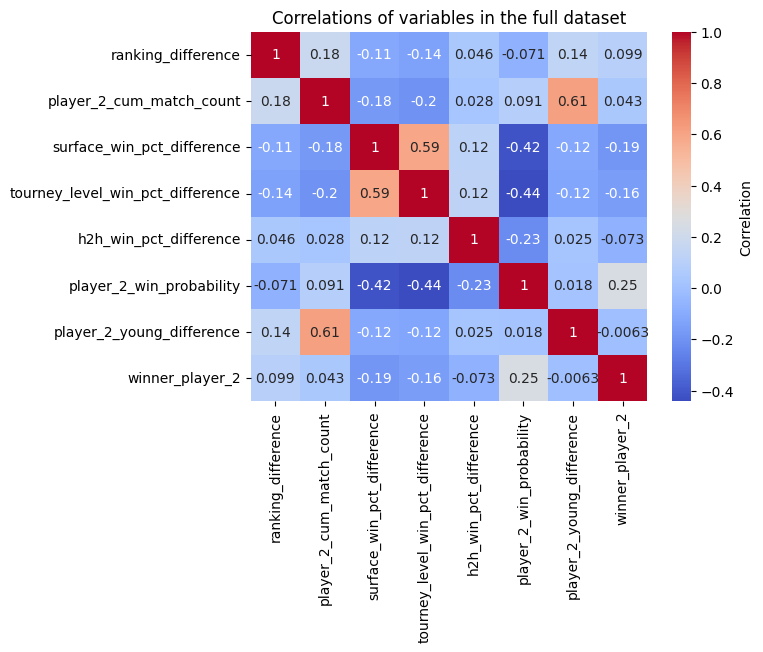

In [94]:
import seaborn as sns

# Determine correlations between variables in the dataset
corr = train.corr()

# Plot the correlations
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation'})
ax.set_title("Correlations of variables in the full dataset")
plt.show()

#### Observations on correlation
- there are no really strong correlation (>0.7 or <-0.7) surface and tourney level have a strong correlation of 0.68 to 0.7
- there is a medium strong correlation between surface_win_pct_difference and tourney_level_win_pct_difference

Due to the low number of variables, and their insignificant correlation, its probably not beneficial to remove any variables in order to resolve the problem of multicollinearity.

### Cleanup
Now that the initial datasets have been used, we cleaup the pandas dataframes which are not required anymore to mitigate excessive memory consumption.

In [95]:
'''
import gc

del matches_2players
del matches_4surfaces
del matches_5levels
del matches_4surfaces_calc
del matches_df
del matches_empty_rank
del matches_features_df
del matches_features_trimmed_df
del matches_lessthan_0mins
del matches_pred_df
del matches_processed_df
del matches_processed_ka_df
del matches_score_text
del matches_tournament_starts
del matches_wins_by_ranking_df
del matches_with_rank

# Invoke garbage collector immediately
gc.collect()

'''

'\nimport gc\n\ndel matches_2players\ndel matches_4surfaces\ndel matches_5levels\ndel matches_4surfaces_calc\ndel matches_df\ndel matches_empty_rank\ndel matches_features_df\ndel matches_features_trimmed_df\ndel matches_lessthan_0mins\ndel matches_pred_df\ndel matches_processed_df\ndel matches_processed_ka_df\ndel matches_score_text\ndel matches_tournament_starts\ndel matches_wins_by_ranking_df\ndel matches_with_rank\n\n# Invoke garbage collector immediately\ngc.collect()\n\n'

## Prediction

In this section, we apply several different prediction models to determine which one gives us the most accurate results for predicting the outcome of a match.

### Define some helper functions

#### Actual vs predicted plot

In [96]:
def actual_vs_predicted_plot(y_true, y_pred):
  min_value=np.array([y_true.min(), y_pred.min()]).min()
  max_value= min=np.array([y_true.max(), y_pred.max()]).max()
  fig = plt.figure()
  ax = fig.gca()
  ax.scatter(y_true,y_pred, color="blue")
  ax.plot([min_value,max_value], [min_value, max_value], lw=4, color="green")
  ax.set_xlabel('Actual')
  ax.set_ylabel('Predicted')
  plt.xlim=0
  plt.ylim=0
  plt.show()

#### ROC plot

In [97]:
def plot_ROC(model, X_test, y_test):
  from sklearn.metrics import RocCurveDisplay
  tree_ROC = RocCurveDisplay.from_estimator(model, X_test, y_test, color='green', linewidth=3)
  plt.title('ROC Curve')
  plt.xlabel('False Alarm (1 - Specificity)')
  plt.ylabel('Recall (Sensitivity)')
  plt.show()

#### Plot confusion matrix

In [98]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_test, y_pred):

    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Player_2_winner = 0', 'Player_2_winner = 1'],
                yticklabels=['Player_2_winner = 0', 'Player_2_winner = 1'])
    plt.xlabel('Predicted Outcome')
    plt.ylabel('Actual Outcome')
    plt.title('Confusion Matrix')
    plt.show()

#### Plot variable importances

In [99]:
def plot_variable_importance(model, X_train):
  importances = pd.Series(data=model.feature_importances_,
                          index=X_train.columns)
  importances.sort_values().plot(kind='barh', color="#00802F")
  plt.title('Features Importances')

### Create Train and Test data
We will reuse 2  data sets for training each model and then testing (evaluating) the model performance.

In [100]:
X = train.drop("winner_player_2", axis=1)
y = train["winner_player_2"]

In [101]:
X

,ranking_difference,player_2_cum_match_count,surface_win_pct_difference,tourney_level_win_pct_difference,h2h_win_pct_difference,player_2_win_probability,player_2_young_difference
0,0.977,33,0.297,0.466,0.000,0.154,15.200
1,0.994,4,0.333,0.333,0.000,0.438,6.700
2,0.982,14,-0.045,0.024,0.000,0.503,5.900
3,0.861,0,0.667,0.686,0.000,0.261,9.600
4,0.986,35,0.100,0.006,0.000,0.251,16.200
...,...,...,...,...,...,...,...
67543,0.989,42,-0.002,-0.119,0.000,0.167,6.300
67544,0.998,389,0.249,0.319,1.000,0.091,11.300
67545,0.999,449,0.009,0.095,0.333,0.306,13.000
67546,0.986,43,0.296,0.168,0.000,0.017,6.300


In [102]:
y

0        0
1        1
2        1
3        0
4        1
        ..
67543    1
67544    0
67545    1
67546    0
67547    0
Name: winner_player_2, Length: 67548, dtype: int64

### Split train and test data
We use a method to split the train and test data 70:30. Note the parameter ```shuffle = False```, which ensures that the temporal order of the data is maintained during the split, reducing the risk of temporal leakage.

In [103]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3
                                                    , random_state = 8
                                                    , shuffle=False
                                                    )
# Split into a 3rd validation set
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,
                                                    test_size = 0.5
                                                    , random_state = 8
                                                    , shuffle=False
                                                    )

### Model 1: Decision Tree

#### Model Creation
Cross validation and hyperparameter optimisation was done separately - see below

In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Instantiate Model
model1_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 5, max_features = 4, min_samples_leaf = 10, random_state=1)

# 2. Fit model
model1_tree.fit(X_train, y_train)

# 3. Make prediction
y_pred = model1_tree.predict(X_test)

# 4. Evaluate Model Performance - accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy (test data): %.3f' % acc)

###########
# Run on 26.1.
# (criterion="entropy", max_depth= 5, max_features = 4, min_samples_leaf= 15, random_state=1)#
# Accuracy (test data): 0.663
###########


Accuracy (test data): 0.663


For a Decision Tree model, with 66.2% there is a slightly better accuracy than our benchmark of 65.6%.

#### Varying the threshold for this model

By default a class probability of > 0.5 determines an upset i.e. player 2 wins!

using .predict_proba() we can get predicted probabilities and try out own tresholds:

In [153]:
# using default threshold, example of probabilities
model1_tree.predict_proba(X_test)

array([[0.87399464, 0.12600536],
       [0.96581197, 0.03418803],
       [0.96581197, 0.03418803],
       ...,
       [0.55980307, 0.44019693],
       [0.62687747, 0.37312253],
       [0.7026178 , 0.2973822 ]])

In [155]:
# Evaluate different thresholds and classification reports pt. 1
print('Classification report with threshold > 0.1:')
y_pred =  (model1_tree.predict_proba(X_test)[:, 1] > 0.1).astype(int)
print(classification_report(y_test, y_pred))


Classification report with threshold > 0.1:
              precision    recall  f1-score   support

           0       0.90      0.10      0.18      6587
           1       0.37      0.98      0.54      3545

    accuracy                           0.41     10132
   macro avg       0.64      0.54      0.36     10132
weighted avg       0.72      0.41      0.30     10132



* This model has much lower accuracy (41%)
* Almost perfect Recall (98% of matches with upsets can be identified)
* Low Precision (Only 37% of predictions are correct)

The threshold of 0.1 is very low, each match with probability of an upset > 10% is flagged as an upset (a quite optimistic model).

In [156]:
# Evaluate different thresholds and classification reports pt. 2
print('Classification report with threshold > 0.4:')
y_pred =  (model1_tree.predict_proba(X_test)[:, 1] > 0.4).astype(int)
print(classification_report(y_test, y_pred))

Classification report with threshold > 0.4:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6587
           1       0.51      0.44      0.47      3545

    accuracy                           0.65     10132
   macro avg       0.61      0.61      0.61     10132
weighted avg       0.65      0.65      0.65     10132



* This model has much higher accuracy (66%)
* Lower Recall (only 44% of matches with upsets can be identified)
* Higher Precision (51%% of predictions are correct)

The threshold of 0.4 is stricter, only matches with probability of an upset > 40% are flagged as an upset (a slightly more conservative model).

For our use of predicting outcomes of tennis matches, we would prefer a model with higher precision. The reason is because it may be used by bettors for gambling purposes, and a low precision would entail higher financial risk. 

#### Confusion matrix for threshold set to 0.4

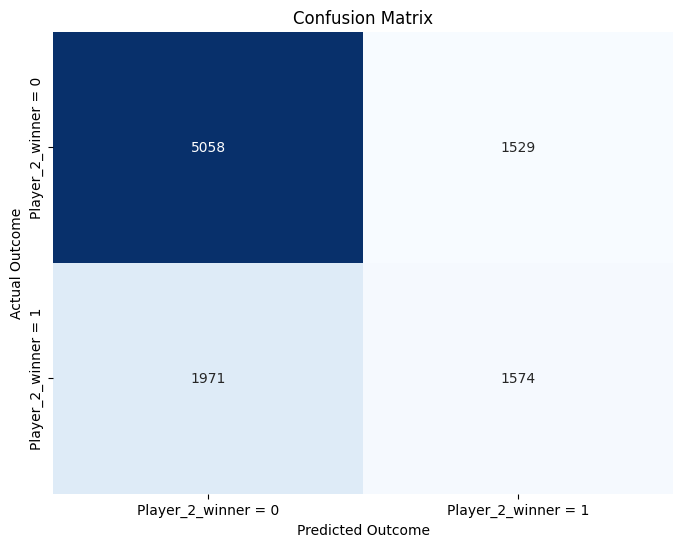

In [157]:
plot_confusion_matrix(y_test, y_pred)

This looks like the best threshold to attain a good balance between true positives (top left quadrant) and true negatives (bottom right quadrant). Also, as we aim to reduce the number of false positives (top right quadrant), its not too bad.

#### DT feature importance

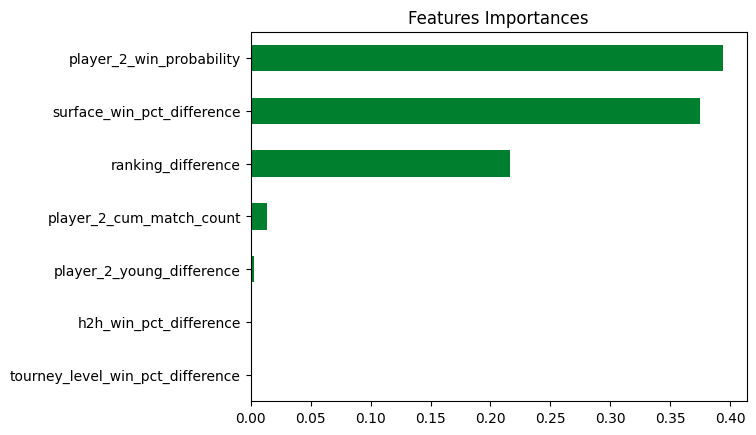

In [158]:
plot_variable_importance(model1_tree, X_train)

The player_2_probability feature is the most important, followed by the ranking_difference and surface_win_pct_difference features. Let's keep this in mind when looking at the next model.

#### Cross validation and hyperparameter optimisation for Decision Tree

In [151]:
# Tested 26.1
# Test duration 9s

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import make_scorer

# 0. Setting up TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# 1. Define hyperparameters for GridSearchCV
parameters = {
            'max_depth':range(3, 8),
            'max_features': [2, 4, 5, 6, 7], 
            'min_samples_leaf': [6, 8, 10, 12]
            }

# 2. Define a scoring function for accuracy
acc_score = make_scorer(accuracy_score, greater_is_better=True)

# 3. Define GridSearch CV object
model1_tree_CV = GridSearchCV(model1_tree, parameters, scoring=acc_score, cv=tscv, return_train_score=True, verbose=3) # Apply 5 TimeSeriesSplits to find best hyperparameters

# 4. Fit GridSearch CV object to model
model1_tree_CV_fitted= model1_tree_CV.fit(X_train, y_train)

# 5. Interpret results
print("Best hyperparameters:", model1_tree_CV_fitted.best_params_)
print("Accuracy (trained cv data): %.3f" % model1_tree_CV_fitted.best_score_)

# 6. Evaluation Generalization Performance
y_pred_model1 = model1_tree_CV_fitted.predict(X_test)

# acc = accuracy_score(y_test, y_pred_model1)
print('Accuracy (tested on "unseen" data): %.3f' % acc)

##########
# Tested:
# parameters = {
        # 'max_depth':range(3, 8),
        # 'max_features': [2, 4, 5, 6, 7], 
        # 'min_samples_leaf': [6, 8, 10, 12]
#             }
# Results:
# Best hyperparameters: {'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 10}
# Accuracy (trained cv data): 0.688
# Accuracy (tested on "unseen" data): 0.661
##########



Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=6;, score=(train=0.662, test=0.674) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=6;, score=(train=0.664, test=0.671) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=6;, score=(train=0.661, test=0.681) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=6;, score=(train=0.662, test=0.686) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=6;, score=(train=0.667, test=0.683) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=8;, score=(train=0.662, test=0.674) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=8;, score=(train=0.664, test=0.671) total time=   0.0s


[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=8;, score=(train=0.661, test=0.681) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=8;, score=(train=0.662, test=0.686) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=8;, score=(train=0.667, test=0.683) total time=   0.1s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=10;, score=(train=0.662, test=0.674) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=10;, score=(train=0.664, test=0.671) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=10;, score=(train=0.661, test=0.681) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=10;, score=(train=0.662, test=0.686) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=10;, score=(train=0.667, test=0.683) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=12;, score=(train=0.662,

###  Model 2: Random Forest Model

#### Model creation without CV (after finding best params below)

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Instantiate Model
model2_rf = RandomForestClassifier(criterion="entropy", max_depth = 8, max_features = 2, n_estimators = 500, random_state=1)

# 2. Fit model
model2_rf.fit(X_train, y_train)

# 3. Make prediction
y_pred = model2_rf.predict(X_test)

# 4. Evaluate Model Performance - accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy (test data): %.3f' % acc)

###########
# Run on 26.1.
# (criterion="entropy", max_depth = 10, n_estimators = 500, random_state=1)#
# Accuracy (test data): 0.668
###########


Accuracy (test data): 0.668


For a Random Forest model, with 66.8% there is a slightly better accuracy than the Decision Tree's model accuracy of 66.3%.

#### Varying the threshold for this model

In [136]:
# using default threshold, example of probabilities
model2_rf.predict_proba(X_test)

array([[0.88450118, 0.11549882],
       [0.932243  , 0.067757  ],
       [0.91701172, 0.08298828],
       ...,
       [0.54983093, 0.45016907],
       [0.62229681, 0.37770319],
       [0.64299786, 0.35700214]])

In [137]:
# Evaluate different thresholds and classification reports pt. 1
print('Classification report with threshold > 0.1:')
y_pred =  (model2_rf.predict_proba(X_test)[:, 1] > 0.1).astype(int)
print(classification_report(y_test, y_pred))


Classification report with threshold > 0.1:


              precision    recall  f1-score   support

           0       0.92      0.07      0.13      6587
           1       0.36      0.99      0.53      3545

    accuracy                           0.39     10132
   macro avg       0.64      0.53      0.33     10132
weighted avg       0.72      0.39      0.27     10132



* This model has a low accuracy (39%), identical to the same threshold on model for Decision Tree.
* Almost perfect Recall  of 99%, almost identical to the same threshold on model for Decision Tree.
* Low Precision (Only 36% of predictions are correct)

The threshold of 0.1 is very low, each match with probability of an upset > 10% is flagged as an upset (a quite optimistic model).

In [138]:
# Evaluate different thresholds and classification reports pt. 2
print('Classification report with threshold > 0.4:')
y_pred =  (model2_rf.predict_proba(X_test)[:, 1] > 0.4).astype(int)
print(classification_report(y_test, y_pred))

Classification report with threshold > 0.4:


              precision    recall  f1-score   support

           0       0.73      0.76      0.75      6587
           1       0.52      0.47      0.49      3545

    accuracy                           0.66     10132
   macro avg       0.62      0.62      0.62     10132
weighted avg       0.65      0.66      0.66     10132



In short: this model with threshold > 0.4 offers better performance (higher accuracy and higher precision) than the threshold > 0.1, but look at the next evaluation with threshold > 0.3.

In [139]:
# Evaluate different thresholds and classification reports pt. 3
print('Classification report with threshold > 0.5:')
y_pred =  (model2_rf.predict_proba(X_test)[:, 1] > 0.5).astype(int)
print(classification_report(y_test, y_pred))

Classification report with threshold > 0.5:


              precision    recall  f1-score   support

           0       0.68      0.92      0.78      6587
           1       0.57      0.20      0.29      3545

    accuracy                           0.67     10132
   macro avg       0.63      0.56      0.54     10132
weighted avg       0.64      0.67      0.61     10132



Compared to the other thresholds:
* This model has much higher accuracy (67%)
* Lower recall (only 20% of matches with upsets can be identified)
* Higher precision (57% of predictions are correct)

The threshold of 0.4 is stricter, only matches with probability of an upset > 40% are flagged as an upset (a slightly more conservative model).

In comparison to the Decision Tree model, here we have a slightly higher accuracy as well as a slightly higher precision. However, this comes at the cost of a drastic reduction in the recall. When selecting this model over the other, one needs to keep this in mind.

#### RF feature importance

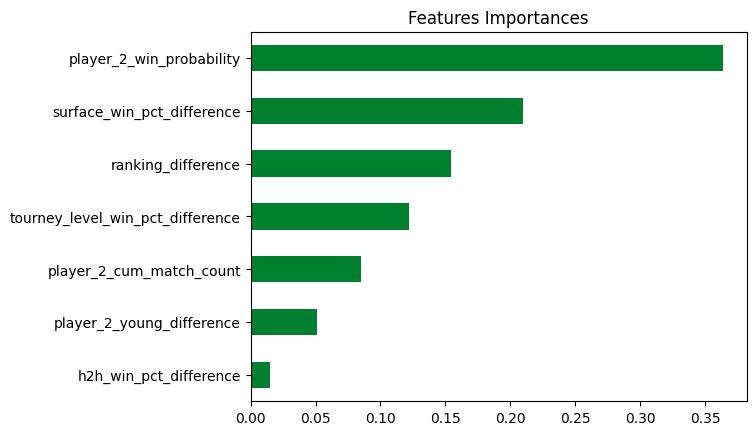

In [140]:
plot_variable_importance(model2_rf, X_train)

The player_2_probability feature is once again the most important, followed by the surface_win_pct_difference and the ranking_difference features. The features importances are more distributed, meaning there are no feature above 0.5 importance like player_2_win_probability in the Decision Tree model.

#### RF cross validation for time series (only run when re-training data or changing the features)

1st attempt (Model 2.1.1 using GridSearchCV and TimeSeriesSplit)

In [118]:
# Test at 26.1.
# Test duration 33m

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score, make_scorer

# 0. Use TimeSeriesSplit instead of train_test_split for CV
tscv = TimeSeriesSplit(n_splits=5)

# 1. Instantiate Model
model2_1_1_rf = RandomForestClassifier(random_state=1)

# 2. Define hyperparameters for GridSearchCV
parameters = {
            'n_estimators': [100, 200, 500],
            'max_features': [2, 4, 8],
            'max_depth': [8, 10, 12],
            # 'min_samples_split': [2, 3, 5, 7], 
            # 'min_samples_leaf': [1, 2, 4]
            }

# 3. Define GridSearchCV object
acc_score = make_scorer(accuracy_score, greater_is_better=True)
model2_1_1_rf_CV = GridSearchCV(model2_1_1_rf, parameters, cv=tscv, scoring=acc_score, verbose=3)


# 4. Fit GridSearchCV to model data
model2_1_1_rf_CV_fitted = model2_1_1_rf_CV.fit(X_train, y_train) # use this for ROC plot

# 5. Interpret results
print("Best hyperparameters:", model2_1_1_rf_CV_fitted.best_params_)
print("Accuracy (trained cv data): %.3f" % model2_1_1_rf_CV_fitted.best_score_)

# 6. Evaluate Model Performance - accuracy
y_pred_model2_1_1 = model2_1_1_rf_CV.predict(X_test)
model2_1_1_acc = accuracy_score(y_test, y_pred_model2_1_1)
print('Accuracy (test data): %.3f' % model2_1_1_acc)

###########
# Tested
#  parameters = {
            # 'n_estimators': [100, 200, 500],
            # # 'max_features': [4, 8, 16],
            # 'max_depth': [10, 20, 50],
            # # 'min_samples_split': [3, 5, 7], 
            # # 'min_samples_leaf': [1, 10, 20, 50]
#           }
# Results
# Best hyperparameters: {'max_depth': 8, 'max_features': 2, 'n_estimators': 500}
# Accuracy (trained cv data): 0.693
# Accuracy (test data): 0.666
###########


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[CV 1/5] END max_depth=8, max_features=2, n_estimators=100;, score=0.674 total time=   1.0s
[CV 2/5] END max_depth=8, max_features=2, n_estimators=100;, score=0.682 total time=   1.7s
[CV 3/5] END max_depth=8, max_features=2, n_estimators=100;, score=0.703 total time=   2.4s
[CV 4/5] END max_depth=8, max_features=2, n_estimators=100;, score=0.707 total time=   3.3s
[CV 5/5] END max_depth=8, max_features=2, n_estimators=100;, score=0.693 total time=   4.2s
[CV 1/5] END max_depth=8, max_features=2, n_estimators=200;, score=0.676 total time=   1.8s
[CV 2/5] END max_depth=8, max_features=2, n_estimators=200;, score=0.682 total time=   3.3s
[CV 3/5] END max_depth=8, max_features=2, n_estimators=200;, score=0.701 total time=   4.8s
[CV 4/5] END max_depth=8, max_features=2, n_estimators=200;, score=0.707 total time=   6.9s
[CV 5/5] END max_depth=8, max_features=2, n_estimators=200;, score=0.693 total time=   8.0s
[CV 1/5] END max_depth=8, max_features=2, n_estimators=500;, score=0.678 total t

2nd Attempt (Model 2.1.2) - using RandomizedSearchCV

In [119]:
''' Only run when exploring other CV type
# Test at 3.1 
# Test duration 18m

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score, make_scorer

# 0. Use TimeSeriesSplit instead of train_test_split for CV
tscv = TimeSeriesSplit(n_splits=5)

# 1. Instantiate Model
model2_1_2_rf = RandomForestClassifier(random_state=1)

# 2. Define hyperparameters for RandomizedSearchCV
parameters = {
            'n_estimators': [500, 700, 1000],
            # 'max_features': [4, 8, 16],
            'max_depth': [5, 6, 7, 8, 9, 10],
            # 'min_samples_split': [2, 3, 5, 7], 
            # 'min_samples_leaf': [1, 2, 4]
            }

# 3. Define RandomizedSearchCV object
acc_score = make_scorer(accuracy_score, greater_is_better=True)
model2_1_2_rf_CV = RandomizedSearchCV(model2_1_2_rf, parameters, cv=tscv, scoring=acc_score, return_train_score=True, verbose=3)


# 4. Fit RandomizedSearchCV to model data
model2_1_2_rf_CV_fitted = model2_1_2_rf_CV.fit(X_train, y_train) # use this for ROC plot

# 5. Interpret results
print("Best hyperparameters:", model2_1_2_rf_CV_fitted.best_params_)
print("Accuracy (trained cv data): %.3f" % model2_1_2_rf_CV_fitted.best_score_)

# -. Get prediction probabilities
# y_pred_model2_1_1.predict_proba(X_test)

# 6. Evaluate Model Performance - accuracy
y_pred_model2_1_2 = model2_1_2_rf_CV.predict(X_test)
model2_1_2_acc = accuracy_score(y_test, y_pred_model2_1_2)
print('Accuracy (test data): %.3f' % model2_1_2_acc)

# -. Print classification report
# y_pred =  (model2_1_1_rf.predict_proba(X_test)[:, 1] > 0.1).astype(int)
# print(classification_report(y_test, y_pred_model2_1_1))

###########
# Tested
#  parameters = {
#               'n_estimators': [500, 700, 1000],
                # 'max_depth': [5, 10, 20],
#               'min_samples_leaf': [1, 2, 4]
#                }
# Results
# Best hyperparameters: {'n_estimators': 700, 'min_samples_leaf': 1, 'max_depth': 5}
# Accuracy (trained cv data): 0.683
# Accuracy (test data): 0.651
###########
'''

' Only run when exploring other CV type\n# Test at 3.1 \n# Test duration 18m\n\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit\nfrom sklearn.metrics import accuracy_score, make_scorer\n\n# 0. Use TimeSeriesSplit instead of train_test_split for CV\ntscv = TimeSeriesSplit(n_splits=5)\n\n# 1. Instantiate Model\nmodel2_1_2_rf = RandomForestClassifier(random_state=1)\n\n# 2. Define hyperparameters for RandomizedSearchCV\nparameters = {\n            \'n_estimators\': [500, 700, 1000],\n            # \'max_features\': [4, 8, 16],\n            \'max_depth\': [5, 6, 7, 8, 9, 10],\n            # \'min_samples_split\': [2, 3, 5, 7], \n            # \'min_samples_leaf\': [1, 2, 4]\n            }\n\n# 3. Define RandomizedSearchCV object\nacc_score = make_scorer(accuracy_score, greater_is_better=True)\nmodel2_1_2_rf_CV = RandomizedSearchCV(model2_1_2_rf, parameters, cv=tscv, scoring=acc_score, return_train_score=True, verb

Optimise the random state of the test data, as we assume the data are not distributed equally.

In [120]:
''' Run as one-off 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_state_value = 1
results_random_state_comparison = []
for random_state in range(1, 21):

  # 1. Instantiate model
  model2_rf  = RandomForestClassifier(random_state=1)

  # 2. Fit Model to Data
  reg = model2_rf.fit(X_train,y_train)

  # 3. Make prediction
  y_pred = model2_rf.predict(X_test)

  # 4. Evaluate Model Performance - accuracy
  acc = accuracy_score(y_test, y_pred)
  #print('Accuracy: %.3f' % acc)

  results_random_state_comparison.append((random_state_value, acc))
  random_state_value = random_state_value+1

df_random_state_results = pd.DataFrame(results_random_state_comparison, columns=['Random State', 'Accuracy'])
print(df_random_state_results)

# Result:
# Top 2 random_states
# randam_state 8 -> Accuracy 0.658
# random_state 10, 17, 18, etc. -> Accuracy 0.656

# Conclusion: Only random_state 8 will be used from now on as a parameter for the train_test_split() method. All previous models are adapted to 
#             use random_state 8.
'''

" Run as one-off \nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score\n\nrandom_state_value = 1\nresults_random_state_comparison = []\nfor random_state in range(1, 21):\n\n  # 1. Instantiate model\n  model2_rf  = RandomForestClassifier(random_state=1)\n\n  # 2. Fit Model to Data\n  reg = model2_rf.fit(X_train,y_train)\n\n  # 3. Make prediction\n  y_pred = model2_rf.predict(X_test)\n\n  # 4. Evaluate Model Performance - accuracy\n  acc = accuracy_score(y_test, y_pred)\n  #print('Accuracy: %.3f' % acc)\n\n  results_random_state_comparison.append((random_state_value, acc))\n  random_state_value = random_state_value+1\n\ndf_random_state_results = pd.DataFrame(results_random_state_comparison, columns=['Random State', 'Accuracy'])\nprint(df_random_state_results)\n\n# Result:\n# Top 2 random_states\n# randam_state 8 -> Accuracy 0.658\n# random_state 10, 17, 18, etc. -> Accuracy 0.656\n\n# Conclusion: Only random_state 8 will be used from now on as 

### Model 3: Gradient Booster Tree Model

#### Model creation without CV (after finding best params below)

In [142]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Instantiate Model
model3_gb= GradientBoostingClassifier(criterion="squared_error", max_depth = 8, max_features = 2, n_estimators = 100, random_state=1)

# 2. Fit model
model3_gb.fit(X_train, y_train)

# 3. Make prediction
y_pred = model3_gb.predict(X_test)

# 4. Evaluate Model Performance - accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy (test data): %.3f' % acc)

###########
# Run on 26.1.
# (criterion="entropy", max_depth = 8, max_features = 2, n_estimators = 100, random_state=1)#
# Accuracy (test data): 0.661
###########


Accuracy (test data): 0.661


For a Gradient Booster model, with 66.1% there is a slightly worse accuracy than the Random Forest's model accuracy of 66.8%.

#### Varying the threshold for this model

In [143]:
# using default threshold, example of probabilities
model3_gb.predict_proba(X_test)

array([[0.7733442 , 0.2266558 ],
       [0.97738864, 0.02261136],
       [0.95159165, 0.04840835],
       ...,
       [0.31812575, 0.68187425],
       [0.60999796, 0.39000204],
       [0.71294703, 0.28705297]])

In [144]:
# Evaluate different thresholds and classification reports pt. 1
print('Classification report with threshold > 0.1:')
y_pred =  (model3_gb.predict_proba(X_test)[:, 1] > 0.1).astype(int)
print(classification_report(y_test, y_pred))


Classification report with threshold > 0.1:
              precision    recall  f1-score   support

           0       0.88      0.12      0.21      6587
           1       0.37      0.97      0.54      3545

    accuracy                           0.42     10132
   macro avg       0.63      0.55      0.38     10132
weighted avg       0.70      0.42      0.33     10132



* This model has a low accuracy (42%), but slightly higher than the same threshold on models for Decision Tree and Random Forest.
* Almost perfect recall of 97%, similar as on models for Decision Tree and Random Forest.
* Low precision (Only 37% of predictions are correct)

The threshold of 0.1 is very low, each match with probability of an upset > 10% is flagged as an upset (a quite optimistic model).

In [145]:
# Evaluate different thresholds and classification reports pt. 2
print('Classification report with threshold > 0.4:')
y_pred =  (model3_gb.predict_proba(X_test)[:, 1] > 0.4).astype(int)
print(classification_report(y_test, y_pred))

Classification report with threshold > 0.4:
              precision    recall  f1-score   support

           0       0.72      0.77      0.75      6587
           1       0.51      0.44      0.47      3545

    accuracy                           0.66     10132
   macro avg       0.62      0.61      0.61     10132
weighted avg       0.65      0.66      0.65     10132



In [146]:
# Evaluate different thresholds and classification reports pt. 3
print('Classification report with threshold > 0.5:')
y_pred =  (model3_gb.predict_proba(X_test)[:, 1] > 0.5).astype(int)
print(classification_report(y_test, y_pred))

Classification report with threshold > 0.5:
              precision    recall  f1-score   support

           0       0.68      0.90      0.78      6587
           1       0.54      0.22      0.31      3545

    accuracy                           0.66     10132
   macro avg       0.61      0.56      0.54     10132
weighted avg       0.63      0.66      0.61     10132



Compared to the other thresholds:
* This model has a higher accuracy (66%)
* Lower recall (only 22% of matches with upsets can be identified)
* Higher precision (54% of predictions are correct)

The threshold of 0.5 is even more strict, only matches with probability of an upset > 50% are flagged as an upset (a slightly more conservative model). In fact, this is the default threshold for this algorithm.

In comparison to the Random Forest model, here we have almost the same accuracy, but a slightly lower precision. The recall is on the lower side, but not as low as for the Random Forest model. When selecting this model over the other, one needs to keep these evaluations in mind.

#### GB feature importance

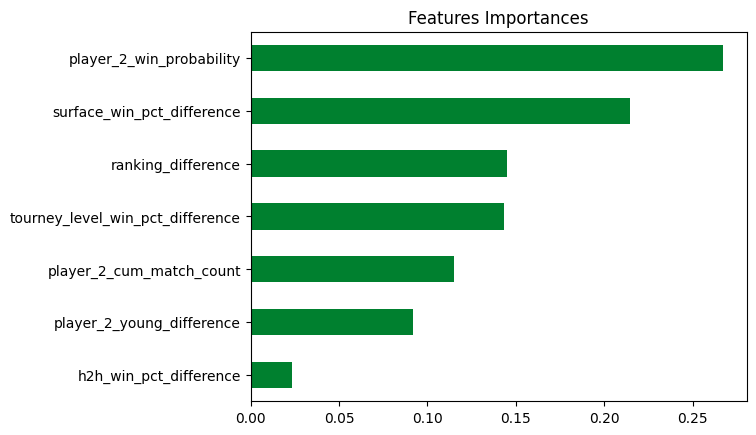

In [147]:
plot_variable_importance(model3_gb, X_train)

Similiar to the Random Forest model, the Gradient Booster model  also spreads out the feature importance more, and marks the features in the same order of importance.

### GB cross validation for time series (only run when re-training data or changing the features)

1st attempt (Model 3.1.1 using GridSearchCV and TimeSeriesSplit)


In [141]:
# Test at 26.1.
# Test duration ..m 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score, make_scorer

# 0. Use TimeSeriesSplit instead of train_test_split for CV
tscv = TimeSeriesSplit(n_splits=5)

# 1. Instantiate Model
model3_1_1_gb = GradientBoostingClassifier(random_state=1)

# 2. Define hyperparameters for GridSearchCV
parameters = {
            'n_estimators': [100, 200],
            'max_features': [2, 4, 8],
            'max_depth': [8, 10, 12],
            # 'min_samples_split': [3, 5, 7], 
            # 'min_samples_leaf': [1, 10, 20, 50]
            }

# 3. Define GridSearchCV object
acc_score = make_scorer(accuracy_score, greater_is_better=True)
model3_1_1_gb_CV = GridSearchCV(model3_1_1_gb, parameters, cv=tscv, scoring=acc_score, verbose=3)


# 4. Fit GridSearchCV to model data
model3_1_1_gb_CV_fitted = model3_1_1_gb_CV.fit(X_train, y_train) # use this for ROC plot

# 5. Interpret results
print("Best hyperparameters:", model3_1_1_gb_CV_fitted.best_params_)
print("Accuracy (trained cv data): %.3f" % model3_1_1_gb_CV_fitted.best_score_)

# 6. Evaluate Model Performance - accuracy
y_pred_model3_1_1 = model3_1_1_gb_CV.predict(X_test)
model3_1_1_acc = accuracy_score(y_test, y_pred_model3_1_1)
print('Accuracy (test data): %.3f' % model3_1_1_acc)

###########
# Tested
#  parameters = {
            # 'n_estimators': [500, 1000],
            # 'max_depth': [5, 10],
            # 'min_samples_split': [3, 5, 7]
#           }
# Results
# Best hyperparameters: {'max_depth': 8, 'n_estimators': 100}
# Accuracy (trained cv data): 0.680
# Accuracy (test data): 0.661
###########


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[CV 1/5] END max_depth=8, max_features=2, n_estimators=100;, score=0.652 total time=   1.6s
[CV 2/5] END max_depth=8, max_features=2, n_estimators=100;, score=0.673 total time=   2.9s
[CV 3/5] END max_depth=8, max_features=2, n_estimators=100;, score=0.691 total time=   4.0s
[CV 4/5] END max_depth=8, max_features=2, n_estimators=100;, score=0.694 total time=   5.8s
[CV 5/5] END max_depth=8, max_features=2, n_estimators=100;, score=0.691 total time=   7.3s
[CV 1/5] END max_depth=8, max_features=2, n_estimators=200;, score=0.646 total time=   4.0s
[CV 2/5] END max_depth=8, max_features=2, n_estimators=200;, score=0.666 total time=   5.9s
[CV 3/5] END max_depth=8, max_features=2, n_estimators=200;, score=0.686 total time=   8.7s
[CV 4/5] END max_depth=8, max_features=2, n_estimators=200;, score=0.695 total time=  10.9s
[CV 5/5] END max_depth=8, max_features=2, n_estimators=200;, score=0.690 total time=  14.0s
[CV 1/5] END max_depth=8, max_features=4, n_estimators=100;, score=0.643 total t

2nd attempt (Model 3.1.2)


In [ ]:
''' Only run when exploring other CV type
# Test at 3.1.
# Test duration 83m

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score

# 0. Use TimeSeriesSplit instead of train_test_split for CV
tscv = TimeSeriesSplit(n_splits=5)

# 1. Instantiate Model
model3_1_2_gb = GradientBoostingClassifier(random_state=1)

# 2. Define hyperparameters for RandomizedSearchCV
parameters = {
            'n_estimators': [100, 200, 500],
            # 'max_features': [4, 8, 16],
            'max_depth': [10, 20, 50],
            # 'min_samples_split': [3, 5, 7], 
            # 'min_samples_leaf': [1, 10, 20, 50]
            }

# 3. Define RandomizedSearchCV object
acc_score = make_scorer(accuracy_score, greater_is_better=True)
model3_1_2_gb_CV = RandomizedSearchCV(model3_1_2_gb, parameters, cv=tscv, scoring=acc_score, verbose=3)


# 4. Fit RandomizedSearchCV to model data
model3_1_2_gb_CV_fitted = model3_1_2_gb_CV.fit(X_train, y_train) # use this for ROC plot

# 5. Interpret results
print("Best hyperparameters:", model3_1_2_gb_CV_fitted.best_params_)
print("Accuracy (trained cv data): %.3f" % model3_1_2_gb_CV_fitted.best_score_)

# -. Get prediction probabilities
# y_pred_model2_1_1.predict_proba(X_test)

# 6. Evaluate Model Performance - accuracy
y_pred_model3_1_2 = model3_1_2_gb_CV.predict(X_test)
model3_1_2_acc = accuracy_score(y_test, y_pred_model3_1_2)
print('Accuracy: %.3f' % model3_1_2_acc)

# -. Print classification report
# y_pred =  (model2_1_1_rf.predict_proba(X_test)[:, 1] > 0.1).astype(int)
# print(classification_report(y_test, y_pred_model2_1_1))

###########
# Tested
#  parameters = {
#               'n_estimators': [500, 700, 1000],
                # 'max_depth': [5, 10, 20],
#               'min_samples_leaf': [1, 2, 4]
#                }
# Results
# Best hyperparameters: {'n_estimators': 500, 'min_samples_leaf': 2, 'max_depth': 5}
# Accuracy (trained cv data): 0.666
# Accuracy (test data): 0.646
###########
'''

' Only run when exploring other CV type\n# Test at 3.1.\n# Test duration 83m\n\nfrom sklearn.ensemble import GradientBoostingClassifier\nfrom sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit\nfrom sklearn.metrics import accuracy_score\n\n# 0. Use TimeSeriesSplit instead of train_test_split for CV\ntscv = TimeSeriesSplit(n_splits=5)\n\n# 1. Instantiate Model\nmodel3_1_2_gb = GradientBoostingClassifier(random_state=1)\n\n# 2. Define hyperparameters for RandomizedSearchCV\nparameters = {\n            \'n_estimators\': [100, 200, 500],\n            # \'max_features\': [4, 8, 16],\n            \'max_depth\': [10, 20, 50],\n            # \'min_samples_split\': [3, 5, 7], \n            # \'min_samples_leaf\': [1, 10, 20, 50]\n            }\n\n# 3. Define RandomizedSearchCV object\nacc_score = make_scorer(accuracy_score, greater_is_better=True)\nmodel3_1_2_gb_CV = RandomizedSearchCV(model3_1_2_gb, parameters, cv=tscv, scoring=acc_score, verbose=3)\n\n\n# 4. Fit RandomizedSear

### Model 4: XGBoost Model

#### Model 4.1.1: plain XGBoost model without hyperparameter tuning


In [ ]:
# Note: run in terminal:
# pip install xgboost

In [ ]:
# 1. Import Model libraries and functions
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# 2. Instantiate model
model4_XGBoostReg  = XGBClassifier()

# 3. Fit model to data
model4_XGBoostReg_fitted = model4_XGBoostReg.fit(X_train,y_train)

# 4. Evaluate Model Performance - accuracy
y_pred_model4 = model4_XGBoostReg_fitted.predict(X_test)
model4_acc = accuracy_score(y_test, y_pred_model4)
print('Accuracy (test data): %.3f' % model4_acc)

###########
# Tested
# parameters - none
# Results
# Accuracy (test data): 0.656
###########

Accuracy (test data): 0.658


#### Model 4.1.2: XGBoost model with RandomizedSearchCV and hyperparameter tuning


In [ ]:
''' Only run when exploring other CV type
# Test at 3.1.
# Test duration 5m

# 1. Import Model libraries and functions
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit

# 0. Use TimeSeriesSplit instead of train_test_split for CV
tscv = TimeSeriesSplit(n_splits=5)

# 1. Instantiate Model
model4_1_2_xgb = XGBClassifier(random_state=1)

# 2. Define hyperparameters for RandomizedSearchCV
parameters =  {'n_estimators': [100, 200, 500],
              'max_depth': range(8, 12),
#              'learning_rate': [0.1],
#              'colsample_bytree': [0.6, 0.8, 1.0],
#              'subsample': [0.6, 0.8, 1.0],
#              'reg_alpha': [0.01, 0.1, 1],
#               'reg_lambda': [0.01, 0.1, 1]
              }

# 3. Define RandomizedSearchCV object
acc_score = make_scorer(accuracy_score, greater_is_better=True)
model4_1_2_xgb_CV = RandomizedSearchCV(model4_1_2_xgb, 
                                       param_distributions = parameters, 
                                       cv=tscv, 
                                       # n_iter = 150,
                                       scoring=acc_score, 
                                       n_jobs=1,
                                       verbose=3,
                                       # return_train_score=True,
                                       random_state=8
                                       )


# 4. Fit RandomizedSearchCV to model data
model4_1_2_xgb_CV_fitted = model4_1_2_xgb_CV.fit(X_train, y_train) # use this for ROC plot

# 5. Interpret results
print("Best hyperparameters:", model4_1_2_xgb_CV_fitted.best_params_)
print("Accuracy (trained cv data): %.3f" % model4_1_2_xgb_CV_fitted.best_score_)

# -. Get prediction probabilities
# y_pred_model2_1_1.predict_proba(X_test)

# 6. Evaluate Model Performance - accuracy
y_pred_model4_1_2 = model4_1_2_xgb_CV.predict(X_test)
model4_1_2_acc = accuracy_score(y_test, y_pred_model4_1_2)
print('Accuracy (test data): %.3f' % model4_1_2_acc)

# -. Print classification report
# y_pred =  (model2_1_1_rf.predict_proba(X_test)[:, 1] > 0.1).astype(int)
# print(classification_report(y_test, y_pred_model2_1_1))

###########
# Tested
#  parameters = {'n_estimators': [50, 100, 400],
#               'max_depth': [3, 5,7],
#               'learning_rate': [0.1],
#               'colsample_bytree': [0.6, 0.8, 1.0],
#               'subsample': [0.6, 0.8, 1.0],
#               'reg_alpha': [0.01, 0.1, 1],
#                # 'reg_lambda': [0.01, 0.1, 1]
#               }
# Results
# Best hyperparameters: {'subsample': 1.0, 'reg_alpha': 0.01, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
# Accuracy (trained cv data): 0.684
# Accuracy (test data): 0.653
###########
'''

' Only run when exploring other CV type\n# Test at 3.1.\n# Test duration 5m\n\n# 1. Import Model libraries and functions\nfrom xgboost import XGBClassifier\nfrom sklearn.metrics import accuracy_score, make_scorer\nfrom sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit\n\n# 0. Use TimeSeriesSplit instead of train_test_split for CV\ntscv = TimeSeriesSplit(n_splits=5)\n\n# 1. Instantiate Model\nmodel4_1_2_xgb = XGBClassifier(random_state=1)\n\n# 2. Define hyperparameters for RandomizedSearchCV\nparameters =  {\'n_estimators\': [100, 200, 500],\n              \'max_depth\': range(8, 12),\n#              \'learning_rate\': [0.1],\n#              \'colsample_bytree\': [0.6, 0.8, 1.0],\n#              \'subsample\': [0.6, 0.8, 1.0],\n#              \'reg_alpha\': [0.01, 0.1, 1],\n#               \'reg_lambda\': [0.01, 0.1, 1]\n              }\n\n# 3. Define RandomizedSearchCV object\nacc_score = make_scorer(accuracy_score, greater_is_better=True)\nmodel4_1_2_xgb_CV = Randomiz

#### Model 4.1.3: XGBoost model with GridSearchCV and hyperparameter tuning


In [ ]:
# Test at 22.1.
# Test duration 19m

# 1. Import Model libraries and functions
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# 0. Use TimeSeriesSplit instead of train_test_split for CV
tscv = TimeSeriesSplit(n_splits=5)

# 1. Instantiate Model
model4_1_3_xgb = XGBClassifier(random_state=1)

# 2. Define hyperparameters for GridSearchCV
parameters =  {'n_estimators': [100, 200],
                'max_depth': range(8, 12),
            #  'learning_rate': [0.1],
            #  'colsample_bytree': [0.6, 0.8],
            #  'subsample': [0.6, 0.8,],
            #  'reg_alpha': [0.1, 1],
            #   'reg_lambda': [0.1, 1]
              }

# 3. Define GridSearchCV object
acc_score = make_scorer(accuracy_score, greater_is_better=True)
model4_1_3_xgb_CV = GridSearchCV(model4_1_3_xgb, 
                                       param_grid = parameters, 
                                       cv=tscv, 
                                       scoring=acc_score, 
                                       n_jobs=1,
                                       verbose=3,
                                       # return_train_score=True
                                       )


# 4. Fit GridSearchCV to model data
model4_1_3_xgb_CV_fitted = model4_1_3_xgb_CV.fit(X_train, y_train) # use this for ROC plot

# 5. Interpret results
print("Best hyperparameters:", model4_1_3_xgb_CV_fitted.best_params_)
print("Accuracy (trained cv data): %.3f" % model4_1_3_xgb_CV_fitted.best_score_)

# -. Get prediction probabilities
# y_pred_model2_1_1.predict_proba(X_test)

# 6. Evaluate Model Performance - accuracy
y_pred_model4_1_3 = model4_1_3_xgb_CV.predict(X_test)
model4_1_3_acc = accuracy_score(y_test, y_pred_model4_1_3)
print('Accuracy (test data): %.3f' % model4_1_3_acc)

# -. Print classification report
# y_pred =  (model2_1_1_rf.predict_proba(X_test)[:, 1] > 0.1).astype(int)
# print(classification_report(y_test, y_pred_model2_1_1))

###########
# Tested
#  parameters = {'n_estimators': [100, 200],
            #    'max_depth': range(8, 12),
            #  'learning_rate': [0.1],
            #  'colsample_bytree': [0.6, 0.8],
            #  'subsample': [0.6, 0.8,],
            #  'reg_alpha': [0.1, 1],
            #   'reg_lambda': [0.1, 1]
            #  }
# Results
# Best hyperparameters: {'max_depth': 8, 'n_estimators': 100}
# Accuracy (trained cv data): 0.667
# Accuracy (test data): 0.660
###########

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .....max_depth=8, n_estimators=100;, score=0.635 total time=   1.7s


[CV 2/5] END .....max_depth=8, n_estimators=100;, score=0.658 total time=   2.8s
[CV 3/5] END .....max_depth=8, n_estimators=100;, score=0.670 total time=   3.1s
[CV 4/5] END .....max_depth=8, n_estimators=100;, score=0.676 total time=  18.5s
[CV 5/5] END .....max_depth=8, n_estimators=100;, score=0.679 total time=  25.8s
[CV 1/5] END .....max_depth=8, n_estimators=200;, score=0.632 total time=   5.3s
[CV 2/5] END .....max_depth=8, n_estimators=200;, score=0.656 total time=  16.5s
[CV 3/5] END .....max_depth=8, n_estimators=200;, score=0.671 total time=   5.1s
[CV 4/5] END .....max_depth=8, n_estimators=200;, score=0.678 total time=   6.5s
[CV 5/5] END .....max_depth=8, n_estimators=200;, score=0.671 total time=  20.0s
[CV 1/5] END .....max_depth=9, n_estimators=100;, score=0.633 total time=   0.9s
[CV 2/5] END .....max_depth=9, n_estimators=100;, score=0.655 total time=   1.7s
[CV 3/5] END .....max_depth=9, n_estimators=100;, score=0.673 total time=   9.0s
[CV 4/5] END .....max_depth=

## Final Conclusion  <a name="final-concl"></a>

...